In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns

import df_visualizations as dv
import remap_values as rv

import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA

In [3]:
%matplotlib inline
plt.style.use( 'dark_background' )
plt.rcParams['figure.figsize'] = (14,10)

In [4]:
prop  = pd.read_csv( 'data/properties_2016.csv' )
trans = pd.read_csv( 'data/train_2016_v2.csv'   )

/home/sean/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
my_df = pd.merge( prop, trans, on='parcelid', how='inner' )
my_df['transactiondate'] =   pd.to_datetime  ( my_df['transactiondate'] )
my_df['time_to_sale'   ] = ( pd.DatetimeIndex( my_df['transactiondate'] ).year - my_df['yearbuilt'] )
my_df['ordinal_date'   ] =  [x.toordinal() for x in my_df['transactiondate']]
my_df['day_of_week'    ] = ( my_df['ordinal_date'] - my_df['ordinal_date'].min() ) % 7

In [78]:
print prop.shape

print prop['buildingclasstypeid'].isnull().sum()
print prop['typeconstructiontypeid'].isnull().sum()
print prop['architecturalstyletypeid'].isnull().sum()
print prop['airconditioningtypeid'].isnull().sum()
print prop['storytypeid'].isnull().sum()
print prop['propertylandusetypeid'].isnull().sum()
print prop['heatingorsystemtypeid'].isnull().sum()

(2985217, 58)
2972588
2978470
2979156
2173698
2983593
11437
1178816


In [6]:
del prop
del trans

In [7]:
print my_df.shape
print my_df.columns.values

(90275, 60)
['parcelid' 'airconditioningtypeid' 'architecturalstyletypeid'
 'basementsqft' 'bathroomcnt' 'bedroomcnt' 'buildingclasstypeid'
 'buildingqualitytypeid' 'calculatedbathnbr' 'decktypeid'
 'finishedfloor1squarefeet' 'calculatedfinishedsquarefeet'
 'finishedsquarefeet12' 'finishedsquarefeet13' 'finishedsquarefeet15'
 'finishedsquarefeet50' 'finishedsquarefeet6' 'fips' 'fireplacecnt'
 'fullbathcnt' 'garagecarcnt' 'garagetotalsqft' 'hashottuborspa'
 'heatingorsystemtypeid' 'latitude' 'longitude' 'lotsizesquarefeet'
 'poolcnt' 'poolsizesum' 'pooltypeid10' 'pooltypeid2' 'pooltypeid7'
 'propertycountylandusecode' 'propertylandusetypeid' 'propertyzoningdesc'
 'rawcensustractandblock' 'regionidcity' 'regionidcounty'
 'regionidneighborhood' 'regionidzip' 'roomcnt' 'storytypeid'
 'threequarterbathnbr' 'typeconstructiontypeid' 'unitcnt'
 'yardbuildingsqft17' 'yardbuildingsqft26' 'yearbuilt' 'numberofstories'
 'fireplaceflag' 'structuretaxvaluedollarcnt' 'taxvaluedollarcnt'
 'assessmenty

In [8]:
my_df.head(20)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,...,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08
5,17125829,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,66.0,...,222070.0,289609.0,2015.0,67539.0,3110.44,NaN,NaN,6.111005e+13,0.0564,2016-08-26
6,17132911,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,185000.0,526000.0,2015.0,341000.0,5632.20,NaN,NaN,6.111006e+13,0.0315,2016-07-08
7,17134926,NaN,NaN,NaN,2.5,5.0,NaN,NaN,2.5,NaN,...,342611.0,571086.0,2015.0,228475.0,6109.94,NaN,NaN,6.111006e+13,0.0257,2016-05-11
8,17139988,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,231297.0,462594.0,2015.0,231297.0,5026.40,NaN,NaN,6.111005e+13,0.0020,2016-06-15
9,17167359,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,NaN,...,134251.0,268502.0,2015.0,134251.0,3217.06,NaN,NaN,6.111004e+13,-0.0576,2016-05-27


First check for trends in error with transaction date

In [7]:
foo = my_df[['logerror','transactiondate']].copy()
foo['ordinal_date'] = [x.toordinal() for x in foo['transactiondate']]

(735964, 736328)

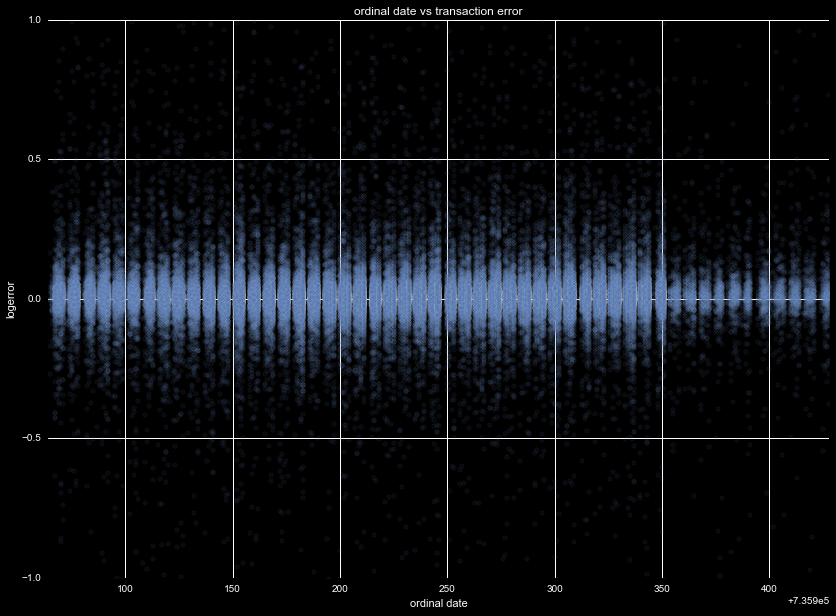

In [49]:
ax = foo.plot.scatter( x='ordinal_date', y='logerror', alpha=0.1 ).set( 
    title='ordinal date vs transaction error', xlabel='ordinal date', ylabel='logerror' )
plt.ylim( -1, 1 )
plt.xlim( foo['ordinal_date'].min(), foo['ordinal_date'].max() )

No super obvious trends

In [32]:
foo['mod_date'] = ( foo['ordinal_date'] - foo['ordinal_date'].min() ) % 7

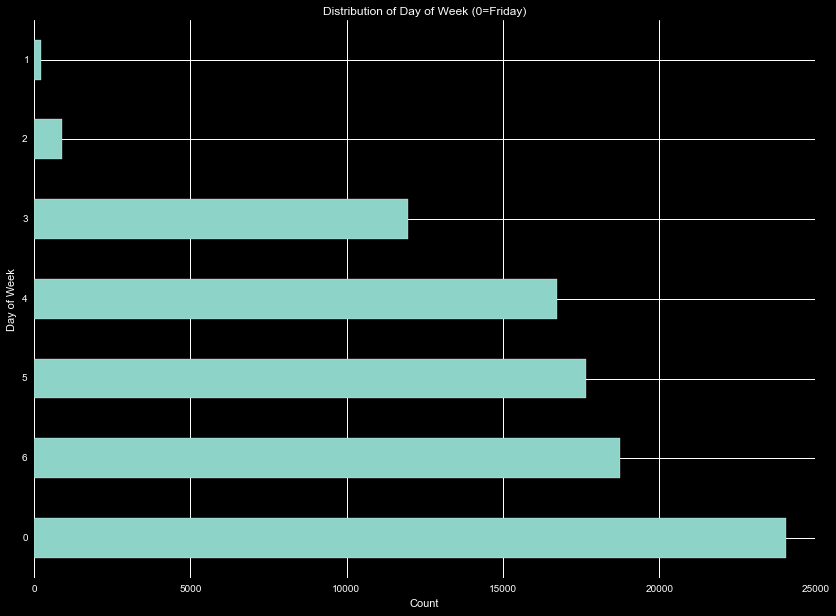

In [37]:
(foo['mod_date'].value_counts( sort=True )).plot.barh().set_title('Distribution of Day of Week (0=Friday)')
plt.xlabel( 'Count' )
plt.ylabel( 'Day of Week'  )

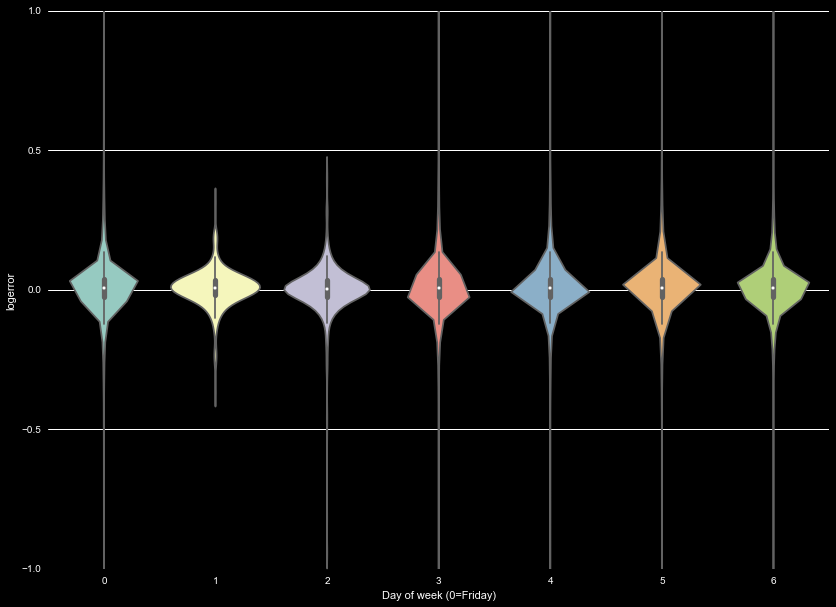

In [48]:
sns.violinplot( data=foo, x='mod_date', y='logerror', bw='silverman' )
plt.ylim( -1, 1 )
plt.xlabel( 'Day of week (0=Friday)' )

Starting with the BuildingClassTypeID:

1 Buildings having fireproofed structural steel frames carrying all wall, floor and roof loads. Wall, floor and roof structures are built of non-combustible materials.

2 Buildings having fireproofed reinforced concrete frames carrying all wall floor and roof loads which are all non-combustible.

3 Buildings having exterior walls built of a non-combustible material such as brick, concrete, block or poured concrete. Interior partitions and roof structures are built of combustible materials. Floor may be concrete or wood frame.

4 Buildings having wood or wood and steel frames

5 Specialized buildings that do not fit in any of the above categories

In [14]:
foo = my_df[['logerror','transactiondate','buildingclasstypeid']]

print foo.shape, foo['buildingclasstypeid'].isnull().sum()

foo.head()

(90275, 3) 90259


,logerror,transactiondate,buildingclasstypeid
0,0.0953,2016-01-27,NaN
1,0.0198,2016-03-30,NaN
2,0.0060,2016-05-27,NaN
3,-0.0566,2016-06-07,NaN
4,0.0573,2016-08-08,NaN


For prop, 2972588/2985217 do not contain id

Useless

TypeConstructionTypeID

1 Adobe 
2 Brick
3 Concrete Block
4 Concrete
5 Dome
6 Frame
7 Heavy
8 Log
9 Light
10 Metal
11 Manufactured
12 Mix
13 Masonry
14 Other
15 Steel
16 Stone
17 Tilt-up
18 Wood

In [20]:
TypeConstructionTypeID_dict={1: 'Adobe',2: 'Brick',3: 'Concrete Block',4: 'Concrete',5: 'Dome',6: 'Frame',7: 'Heavy',8: 'Log',9: 'Light',
                     10: 'Metal',11: 'Manufactured',12: 'Mix',13: 'Masonry',14: 'Other',15: 'Steel',16: 'Stone',17: 'Tilt-up',18: 'Wood'}

In [19]:
foo = my_df[['logerror','transactiondate','typeconstructiontypeid']].copy()
foo['typeconstructiontypeid'] = foo['typeconstructiontypeid'].replace( TypeConstructionTypeID_dict )

In [22]:
print foo.shape
print foo['typeconstructiontypeid'].isnull().sum()

(90275, 3)
89976


Another not too useful category

Of the sold stuff, only 89976 of 90275 do not have this data
2978470 In the full set

ArchitecturalTypeID

1	A-Frame
2	Bungalow
3	Cape Cod
4	Cottage
5	Colonial
6	Custom
7	Contemporary
8	Conventional
9	Dome
10	French Provincial
11	Georgian
12	High Rise
13	Historical
14	Log Cabin/Rustic
15	Mediterranean
16	Modern
17	Mansion
18	English
19	Other
20	Prefab
21	Ranch/Rambler
22	Raised Ranch
23	Spanish
24	Traditional
25	Tudor
26	Unfinished/Under Construction
27	Victorian

Another useless category, with 2979156/2985217 missing

AirConditioningTypeID more promising, with 2173698/2985217 missing. We have about 30%

1	Central
2	Chilled Water
3	Evaporative Cooler
4	Geo Thermal
5	None
6	Other
7	Packaged AC Unit
8	Partial
9	Refrigeration
10	Ventilation
11	Wall Unit
12	Window Unit
13	Yes

In [41]:
air_conditioning_dict = {1:'Central',2:'Chilled Water',3:'Evaporative Cooler',4:'Geo Thermal',5:'None',6:'Other',
                         7:'Packaged AC Unit',8:'Partial',9:'Refrigeration',10:'Ventilation',11:'Wall Unit',12:'Window Unit',13:'Yes'}

In [45]:
foo = my_df[['logerror','transactiondate','airconditioningtypeid']].copy()
foo['airconditioningtypeid'] = foo['airconditioningtypeid'].replace( air_conditioning_dict )
foo['airconditioningtypeid'].fillna( 'NaN', inplace=True )

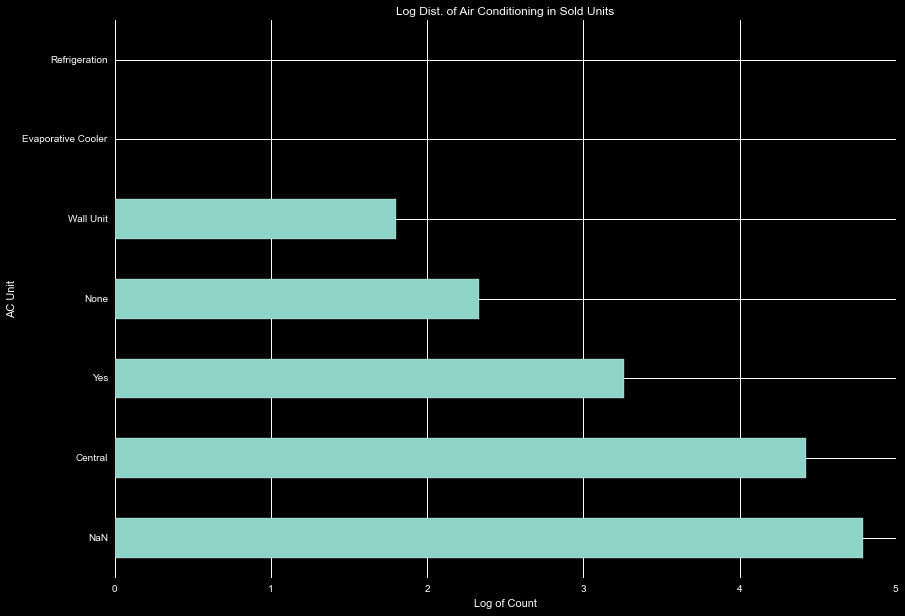

In [50]:
np.log10(foo['airconditioningtypeid'].value_counts( sort=True )).plot.barh().set_title('Log Dist. of Air Conditioning in Sold Units')
plt.xlabel( 'Log of Count' )
plt.ylabel( 'AC Unit'      )

(-1, 1)

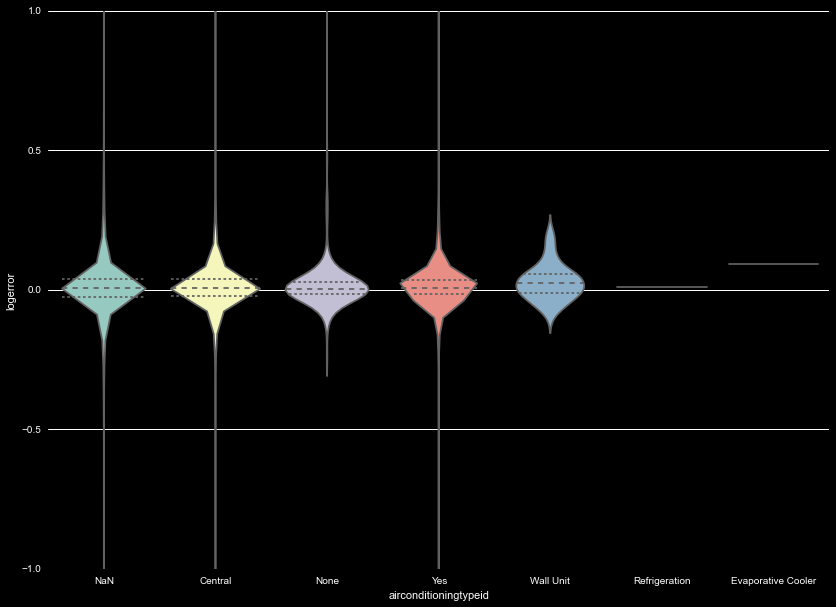

In [54]:
sns.violinplot( x='airconditioningtypeid', y='logerror', data=foo, inner='quart' )
plt.ylim( -1, 1 )

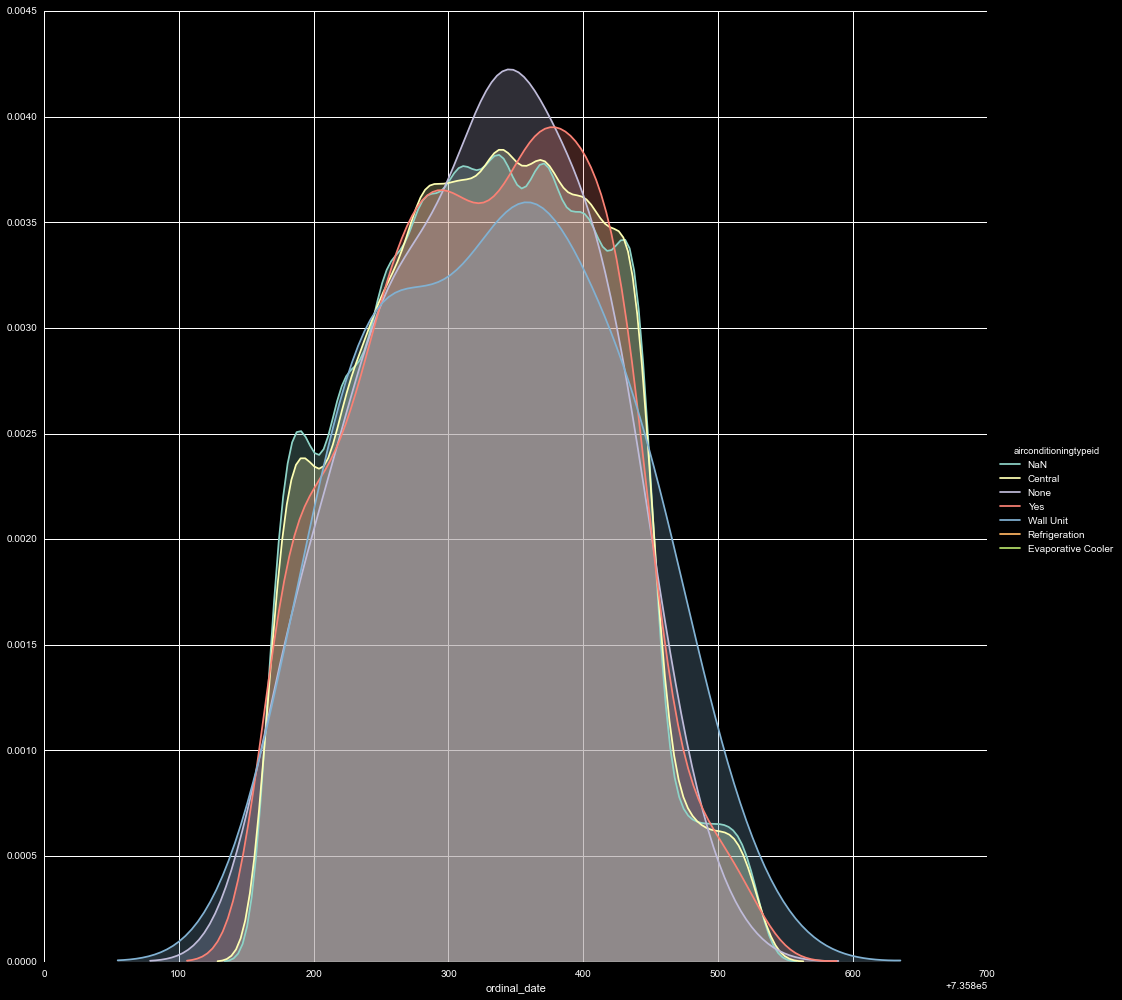

In [63]:
foo['ordinal_date'] = [x.toordinal() for x in foo['transactiondate']]
sns.FacetGrid( data=foo, hue='airconditioningtypeid', size=14 ).map( sns.kdeplot, 'ordinal_date', shade=True ).add_legend()

In [65]:
# Absorb Refrigeration, Evaporative Cooler, and Wall Unit into Yes, and recreate above plots
foo['airconditioningtypeid'].replace( {'Wall Unit':'Yes', 'Refrigeration':'Yes', 'Evaporative Cooler':'Yes'}, inplace=True )

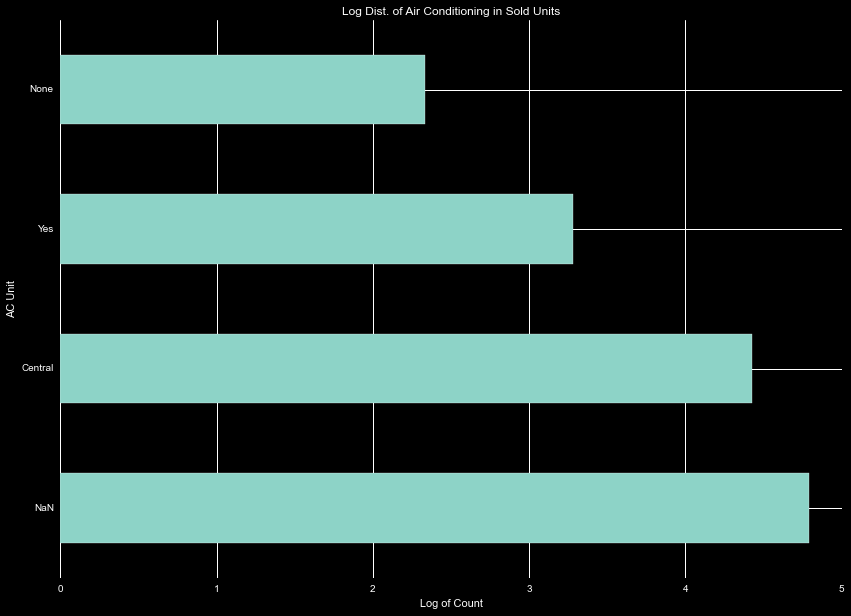

In [66]:
np.log10(foo['airconditioningtypeid'].value_counts( sort=True )).plot.barh().set_title('Log Dist. of Air Conditioning in Sold Units')
plt.xlabel( 'Log of Count' )
plt.ylabel( 'AC Unit'      )

(-1, 1)

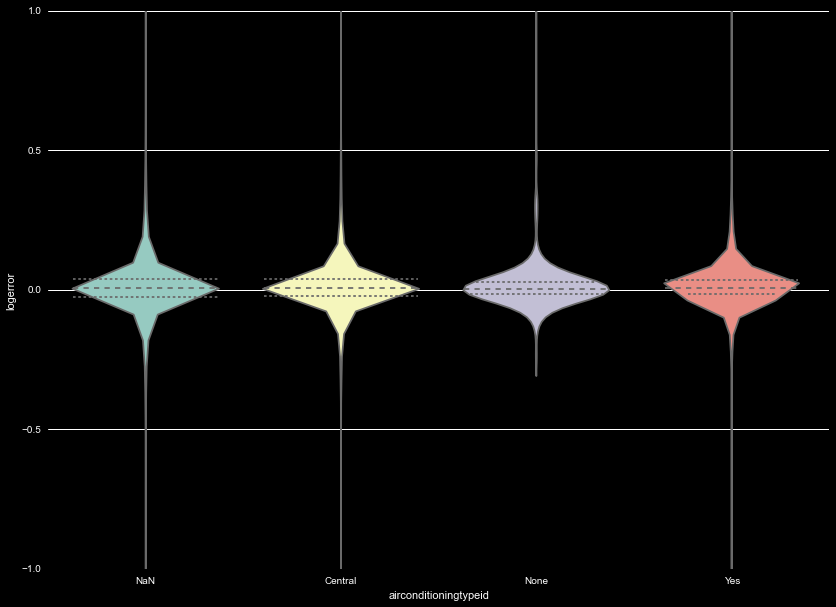

In [67]:
sns.violinplot( x='airconditioningtypeid', y='logerror', data=foo, inner='quart' )
plt.ylim( -1, 1 )

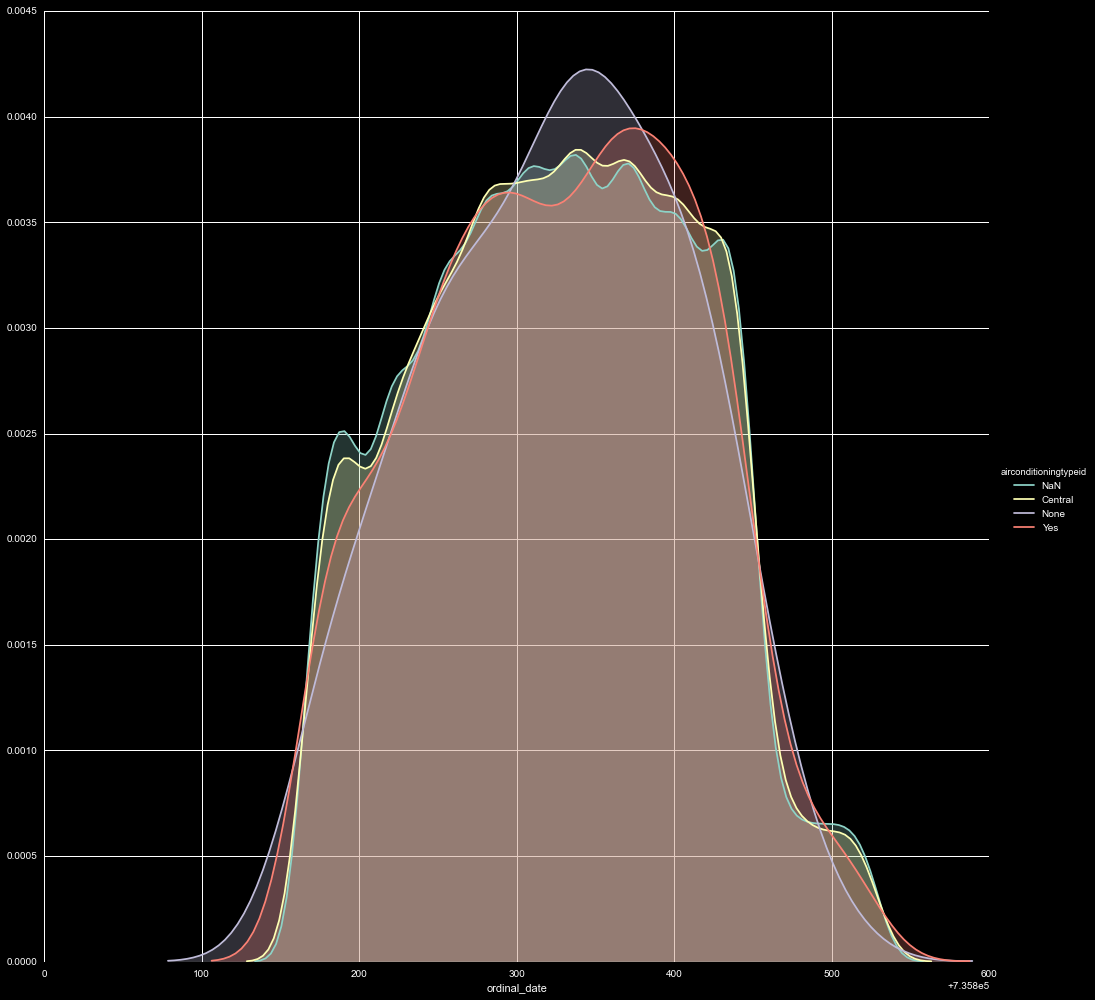

In [68]:
foo['ordinal_date'] = [x.toordinal() for x in foo['transactiondate']]
sns.FacetGrid( data=foo, hue='airconditioningtypeid', size=14 ).map( sns.kdeplot, 'ordinal_date', shade=True ).add_legend()

There are slight differences in the AC types

If we distinguish between, yes, no, nan, and central, there appears to be slight diffs in the time bought

StoryTypeID	StoryDesc

1	Attic & Basement
2	Attic
3	Bi-Level with Attic & Basement
4	Bi-Level
5	Bi-Level with Attic
6	Bi-Level with Basement
7	Basement
8	Split Entry with Attic & Basement
9	Split Foyer with Attic & Basement
10	Level with Attic & Basement
11	Level with Attic
12	Level with Basement
13	Level
14	Multi-Level with Attic & Basement
15	Multi-Level
16	Multi-Level with Attic
17	Multi-Level with Basement
18	Split Level with Attic & Basement
19	Single Level with Attic & Basement
20	Split Entry with Attic
21	Split Entry with Basement
22	Split Foyer with Attic
23	Split Foyer with Basement
24	Single Level with Attic
25	Single Level with Basement
26	Single Level
27	Split Level with Attic
28	Split Level with Basement
29	Split Entry
30	Split Foyer
31	Split Level
32	Tri-level with Attic & Basement
33	Tri-level with Attic
34	Tri-level with Basement
35	Tri-level

Another case with 2983953/2985217 missing

PropertyLandUseTypeID	PropertyLandUseDesc 11437/2985217

31	Commercial/Office/Residential Mixed Used
46	Multi-Story Store
47	Store/Office (Mixed Use)
246	Duplex (2 Units, Any Combination)
247	Triplex (3 Units, Any Combination)
248	Quadruplex (4 Units, Any Combination)
260	Residential General
261	Single Family Residential
262	Rural Residence
263	Mobile Home
264	Townhouse
265	Cluster Home
266	Condominium
267	Cooperative
268	Row House
269	Planned Unit Development
270	Residential Common Area
271	Timeshare
273	Bungalow
274	Zero Lot Line
275	Manufactured, Modular, Prefabricated Homes
276	Patio Home
279	Inferred Single Family Residential
290	Vacant Land - General
291	Residential Vacant Land

In [80]:
land_use_dict = {31	:'CommercialOfficeResidential',46	:'MultiStoryStore',47	:'StoreOffice',246	:'Duplex',247	:'Triplex',
                 248	:'Quadruplex',260	:'ResidentialGeneral',261	:'SingleFamilyResidential',262	:'RuralResidence',
                 263	:'MobileHome',264	:'Townhouse',265	:'ClusterHome',266	:'Condominium',267	:'Cooperative',268	:'RowHouse',
                 269	:'PlannedUnitDevelopment',270	:'ResidentialCommonArea',271	:'Timeshare',273	:'Bungalow',
                 274	:'ZeroLotLine',275	:'ManufacturedModularPrefabricatedHomes',276	:'PatioHome',
                 279	:'InferredSingleFamilyResidential',290	:'VacantLandGeneral',291	:'ResidentialVacantLand'}

In [81]:
var = 'propertylandusetypeid'
foo = my_df[['logerror','transactiondate',var]].copy()
foo[var] = foo[var].replace( land_use_dict )
foo[var].fillna( 'NaN', inplace=True )

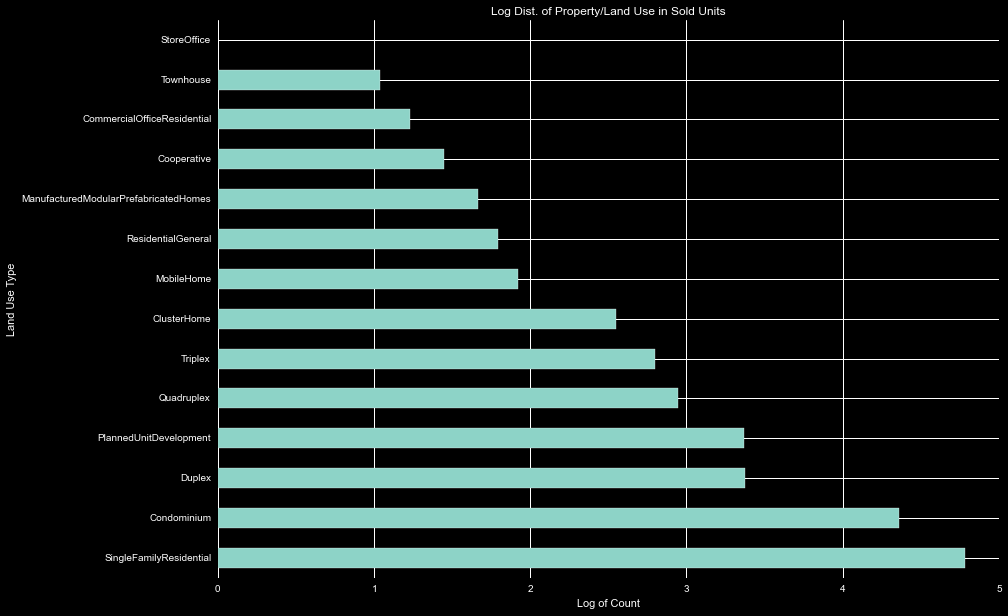

In [83]:
np.log10(foo[var].value_counts( sort=True )).plot.barh().set_title('Log Dist. of Property/Land Use in Sold Units')
plt.xlabel( 'Log of Count' )
plt.ylabel( 'Land Use Type' )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

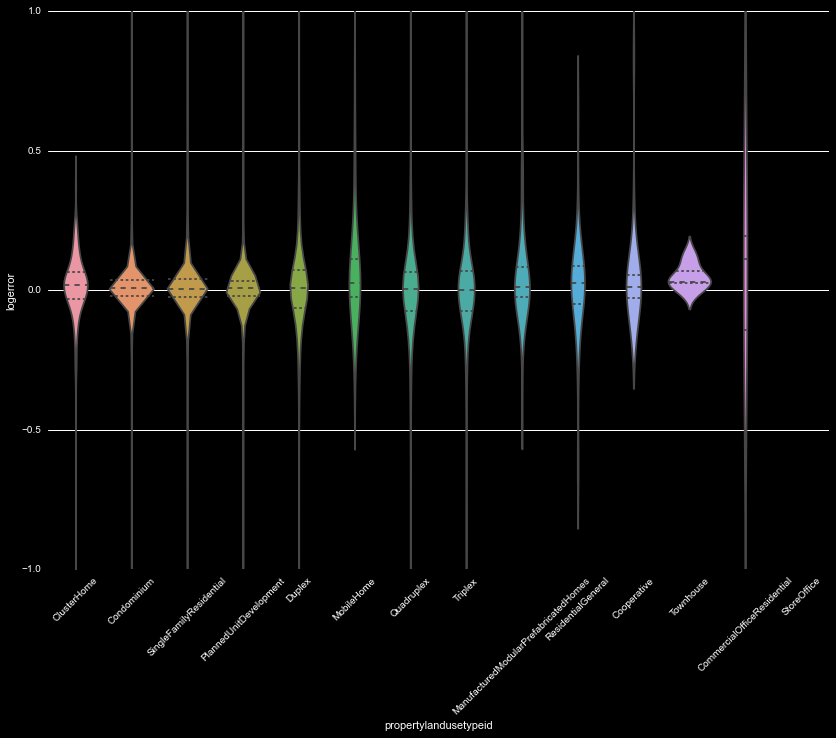

In [87]:
ax = sns.violinplot( x=var, y='logerror', data=foo, inner='quart' )
plt.ylim( -1, 1 )
plt.xticks( rotation=45 )
#ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

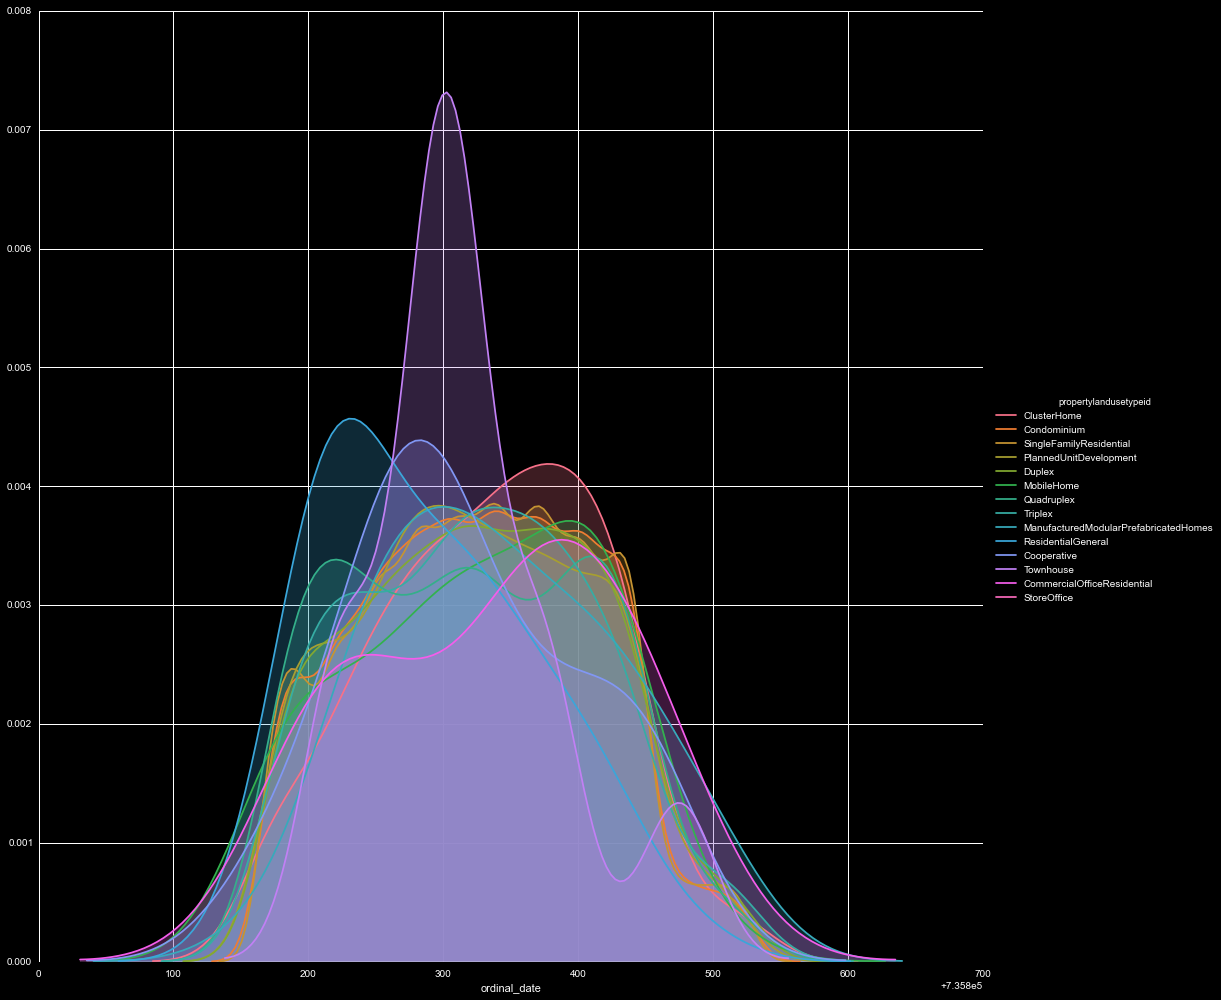

In [88]:
foo['ordinal_date'] = [x.toordinal() for x in foo['transactiondate']]
sns.FacetGrid( data=foo, hue=var, size=14 ).map( sns.kdeplot, 'ordinal_date', shade=True ).add_legend()

HeatingOrSystemTypeID	HeatingOrSystemDesc 1178816/2985217

1	Baseboard
2	Central
3	Coal
4	Convection
5	Electric
6	Forced air
7	Floor/Wall
8	Gas
9	Geo Thermal
10	Gravity
11	Heat Pump
12	Hot Water
13	None
14	Other
15	Oil
16	Partial
17	Propane
18	Radiant
19	Steam
20	Solar
21	Space/Suspended
22	Vent
23	Wood Burning
24	Yes
25	Zone

In [91]:
heating_dict = {1	:'Baseboard',2	:'Central',3	:'Coal',4	:'Convection',5	:'Electric',6	:'Forced air',7	:'Floor/Wall',8	:'Gas',
                9	:'Geo Thermal',10	:'Gravity',11	:'Heat Pump',12	:'Hot Water',13	:'None',14	:'Other',15	:'Oil',16	:'Partial',
                17	:'Propane',18	:'Radiant',19	:'Steam',20	:'Solar',21	:'SpaceSuspended',22	:'Vent',23	:'Wood Burning',24:'Yes',
                25	:'Zone'}

In [92]:
var = 'heatingorsystemtypeid'
foo = my_df[['logerror','transactiondate',var]].copy()
foo[var] = foo[var].replace( heating_dict )
foo[var].fillna( 'NaN', inplace=True )

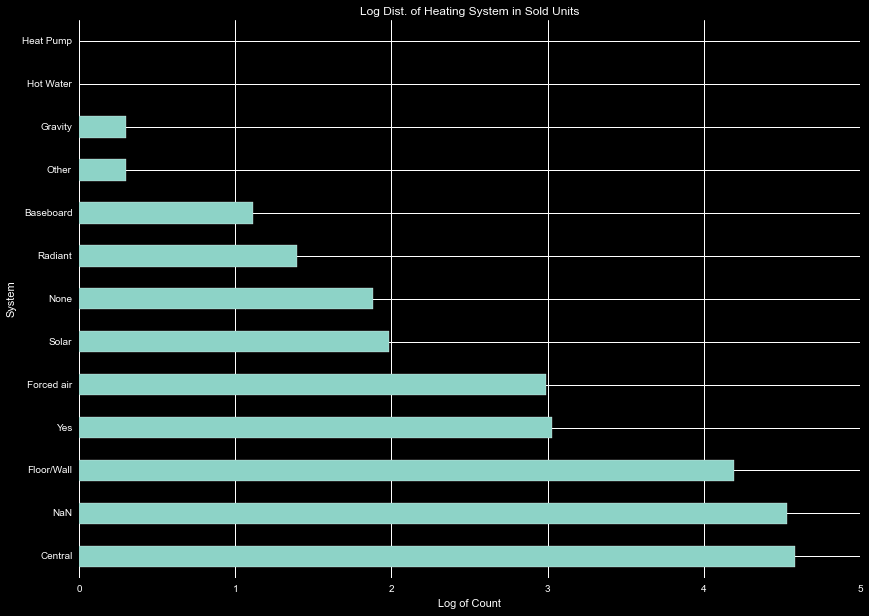

In [94]:
np.log10(foo[var].value_counts( sort=True )).plot.barh().set_title('Log Dist. of Heating System in Sold Units')
plt.xlabel( 'Log of Count' )
plt.ylabel( 'System' )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

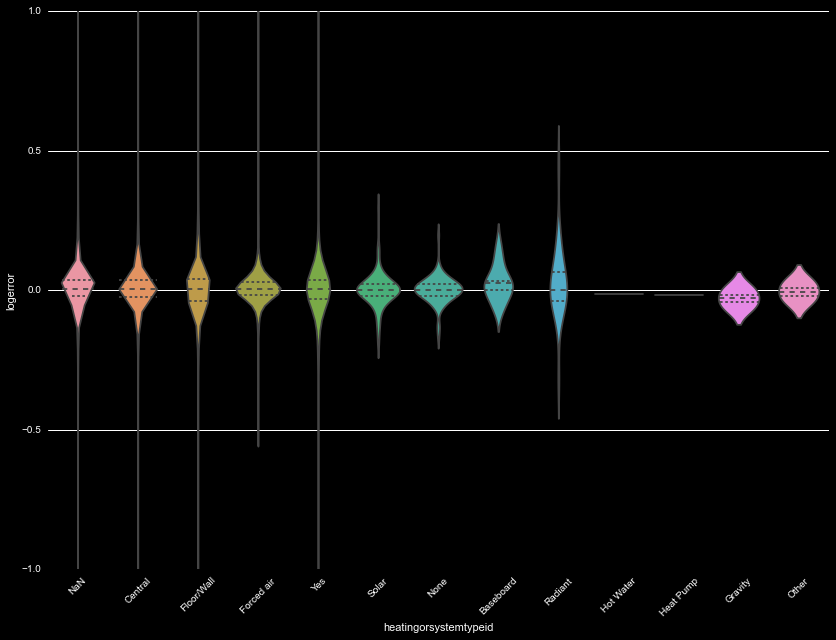

In [96]:
ax = sns.violinplot( x=var, y='logerror', data=foo, inner='quart' )
plt.ylim( -1, 1 )
plt.xticks( rotation=45 )
#ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

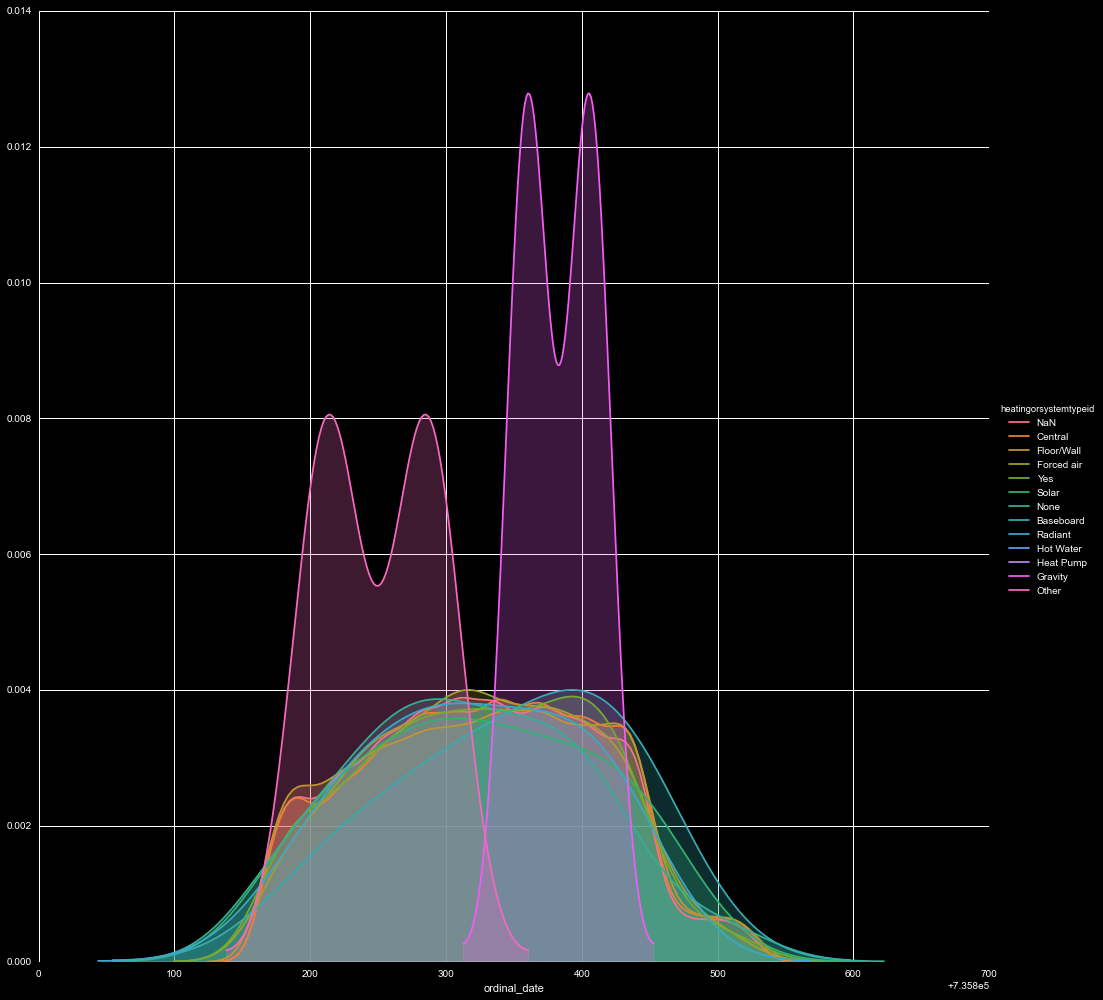

In [97]:
foo['ordinal_date'] = [x.toordinal() for x in foo['transactiondate']]
sns.FacetGrid( data=foo, hue=var, size=14 ).map( sns.kdeplot, 'ordinal_date', shade=True ).add_legend()

Now to handle these non-unique values

In [23]:
# Trim list of useable variables
done_list = ['airconditioningtypeid','architecturalstyletypeid','buildingclasstypeid','heatingorsystemtypeid',
             'propertylandusetypeid','storytypeid','typeconstructiontypeid']

my_df = my_df.drop( done_list, axis=1 )

In [24]:
# big_df.columns.str.contains('raion')

In [26]:
my_df.isnull().sum().sort_values()

parcelid                            0
assessmentyear                      0
roomcnt                             0
regionidcounty                      0
rawcensustractandblock              0
logerror                            0
longitude                           0
latitude                            0
fips                                0
transactiondate                     0
bathroomcnt                         0
bedroomcnt                          0
landtaxvaluedollarcnt               1
propertycountylandusecode           1
taxvaluedollarcnt                   1
taxamount                           6
regionidzip                        35
structuretaxvaluedollarcnt        380
censustractandblock               605
calculatedfinishedsquarefeet      661
yearbuilt                         756
calculatedbathnbr                1182
fullbathcnt                      1182
regionidcity                     1803
finishedsquarefeet12             4679
lotsizesquarefeet               10150
unitcnt     

In [25]:
my_df.columns.values

array(['parcelid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13',
       'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt',
       'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'yearbuilt', 'numberofstories',
       'fireplaceflag', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 

Pools are an easy thing to group

In [60]:
pool_list = my_df.columns[ my_df.columns.str.contains( 'pool' ) ] + ['hashottuborspa']
foo = my_df[ pool_list ].copy()
foo['logerror'] = my_df['logerror']
foo['date']     = my_df['time_to_sale']
foo.isnull().sum().sort_values()

logerror            0
date              756
poolcnt         72374
pooltypeid7     73578
pooltypeid2     89071
pooltypeid10    89114
poolsizesum     89306
dtype: int64

Type 2 is pool/spa/hottub, 7 is pool, 10 is hottub 

In [61]:
foo['pooltypeid2' ].fillna( 0, inplace=True )
foo['pooltypeid7' ].fillna( 0, inplace=True )
foo['pooltypeid10'].fillna( 0, inplace=True )
foo['poolcnt'     ].fillna( 0, inplace=True )
foo['poolsizesum' ].fillna( 0, inplace=True )

(-1, 1)

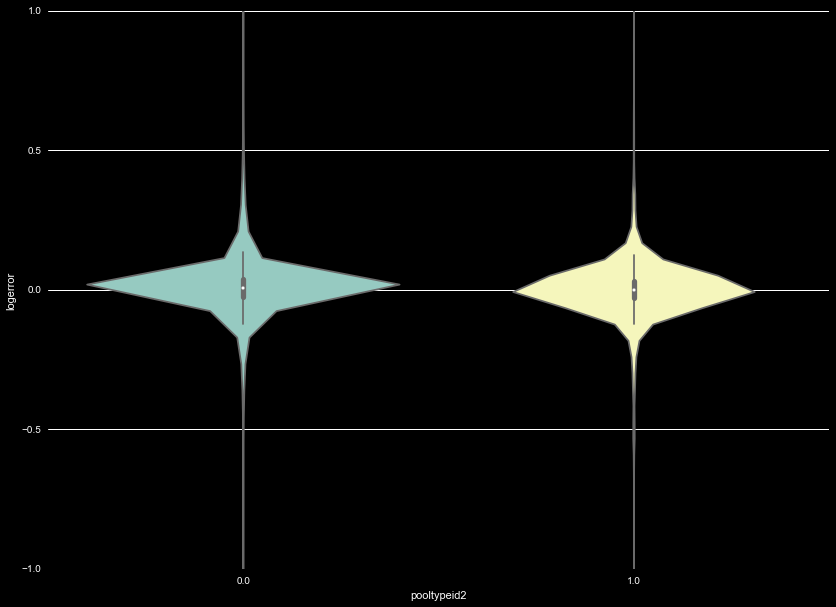

In [63]:
sns.violinplot( data=foo, x='pooltypeid2', y='logerror' )
plt.ylim( -1, 1 )

(-1, 1)

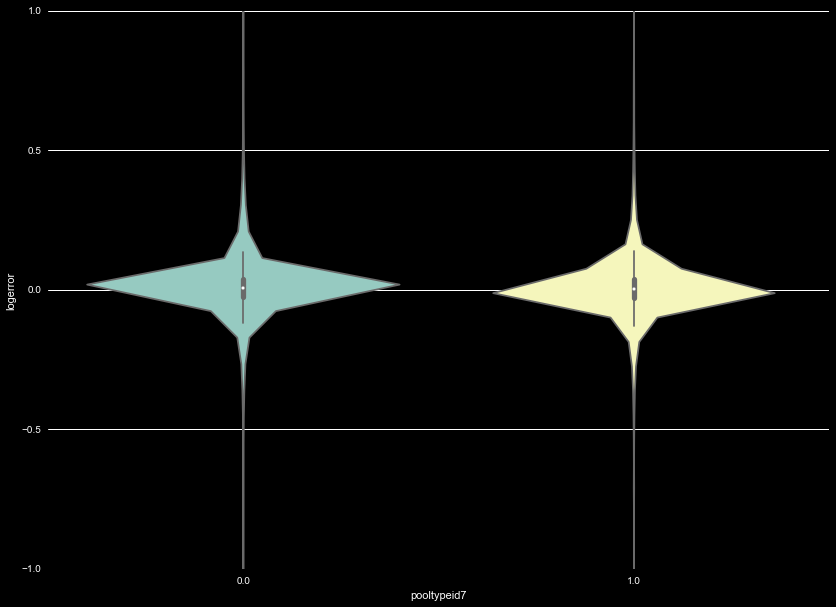

In [64]:
sns.violinplot( data=foo, x='pooltypeid7', y='logerror' )
plt.ylim( -1, 1 )

(-1, 1)

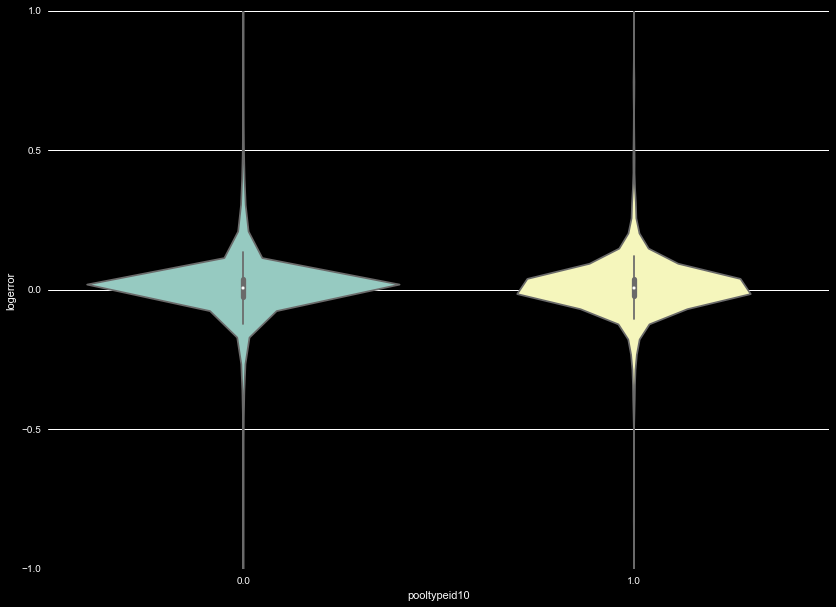

In [65]:
sns.violinplot( data=foo, x='pooltypeid10', y='logerror' )
plt.ylim( -1, 1 )

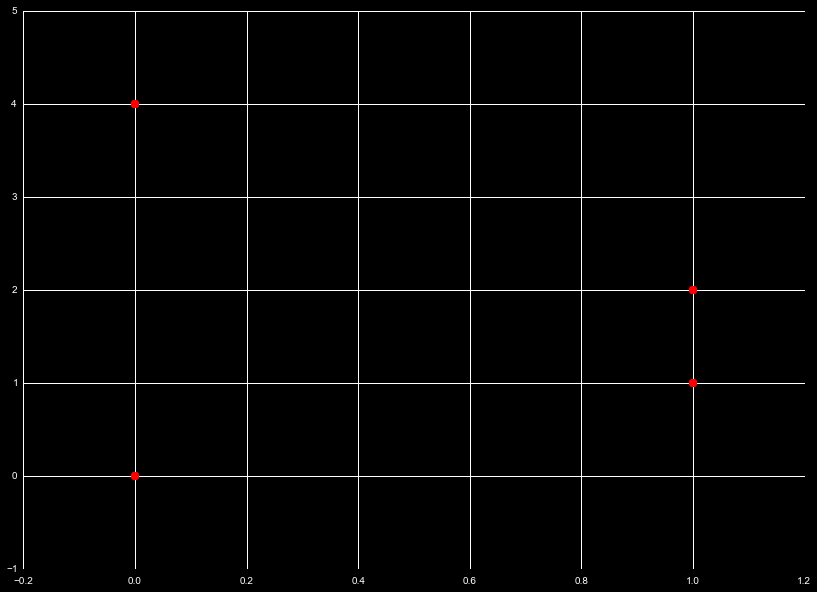

In [67]:
plt.scatter( foo.poolcnt, foo.pooltypeid2+2*foo.pooltypeid7+4*foo.pooltypeid10, color='r', s=50 )

break into two variables, pool sf, has hottub, it's all redundant info. But, useful

In [68]:
my_df.drop( pool_list, axis=1, inplace=True )

Next let's do garage stuff

In [70]:
garage_list = my_df.columns[ my_df.columns.str.contains( 'garage' ) ]
foo = my_df[ garage_list ].copy()
foo['logerror'] = my_df['logerror']
foo['date']     = my_df['time_to_sale']
foo.isnull().sum().sort_values()

logerror               0
date                 756
garagecarcnt       60338
garagetotalsqft    60338
dtype: int64

In [72]:
foo['garagecarcnt'   ].fillna( 0, inplace=True )
foo['garagetotalsqft'].fillna( 0, inplace=True )

In [73]:
var = 'garagecarcnt'

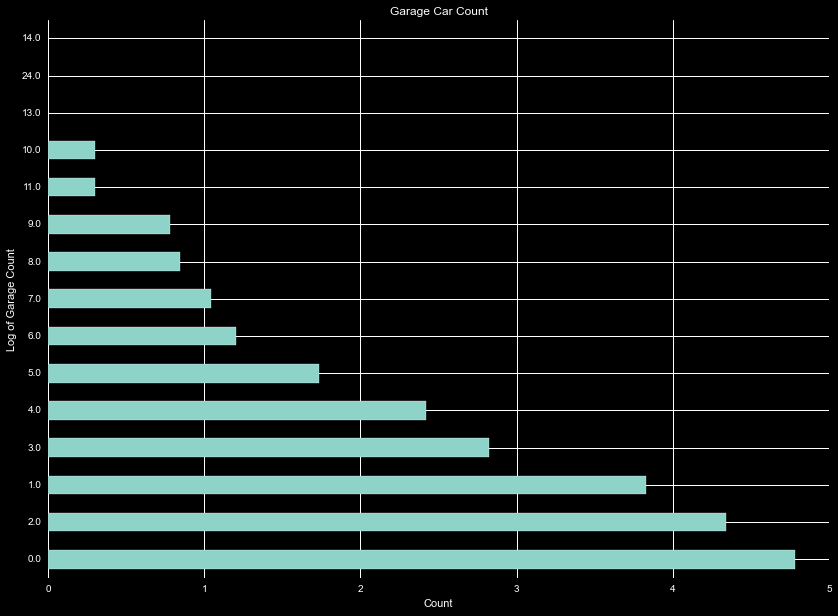

In [76]:
np.log10( foo[var].value_counts( sort=True ) ).plot.barh().set_title( 'Garage Car Count' )
plt.xlabel( 'Count' )
plt.ylabel( 'Log of Garage Count' )

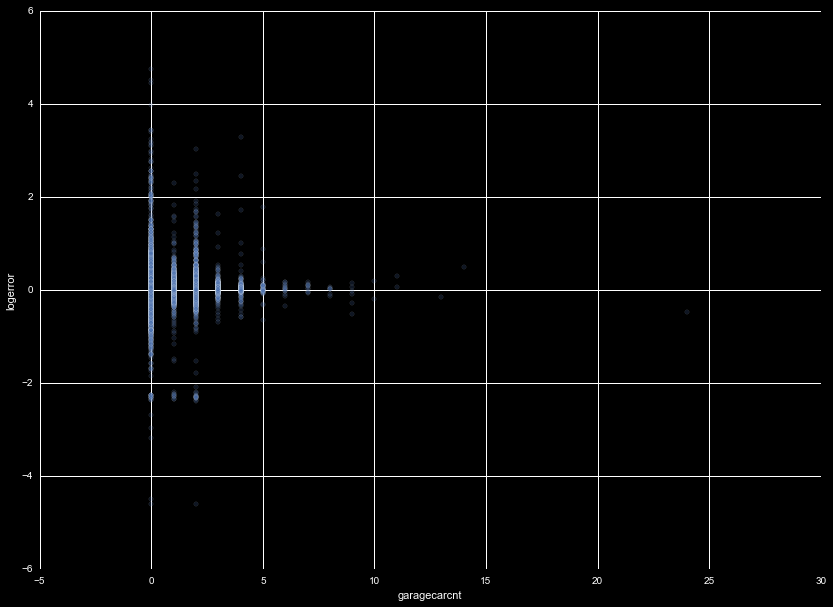

In [81]:
foo.plot.scatter( x='garagecarcnt', y='logerror', s=20, alpha=0.2 )

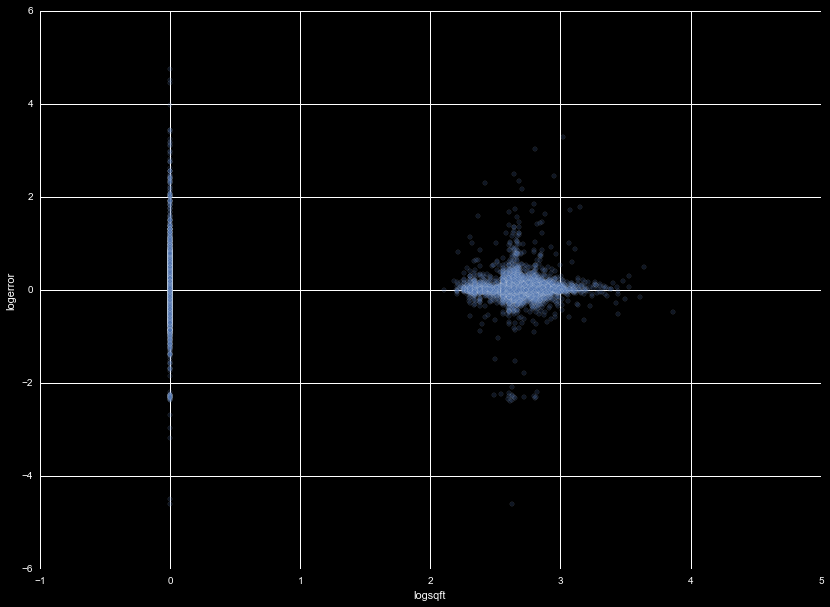

In [84]:
foo['logsqft'] = np.log10( foo['garagetotalsqft']+1 )
foo.plot.scatter( x='logsqft', y='logerror', s=20, alpha=0.2 )

Should break garagecarcnt from >5 to 5

Need to log distribution the square footage

Alternatively, remove car count and just do square footage

In [85]:
my_df.drop( garage_list, axis=1, inplace=True )

In [88]:
bath_list = my_df.columns[ my_df.columns.str.contains( 'bath' ) ]
foo = my_df[ bath_list ].copy()
foo['logerror'] = my_df['logerror']
foo['date']     = my_df['time_to_sale']
foo.isnull().sum().sort_values()

bathroomcnt                0
logerror                   0
date                     756
calculatedbathnbr       1182
fullbathcnt             1182
threequarterbathnbr    78266
dtype: int64

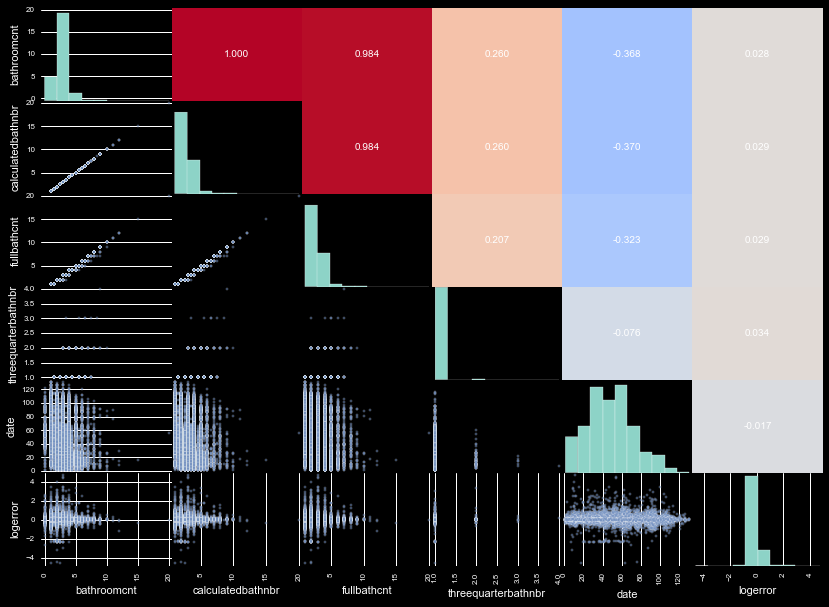

In [91]:
dv.corr_plot( foo, focus='logerror' )

Drop all but calculatedbathnbr

In [92]:
my_df.drop( bath_list, axis=1, inplace=True )

In [93]:
my_df = my_df[['parcelid', 'basementsqft', 'bedroomcnt', 'buildingqualitytypeid',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips',
       'fireplacecnt', 'hashottuborspa', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'censustractandblock', 'logerror', 'transactiondate', 'time_to_sale',
       'ordinal_date','day_of_week']]

In [94]:
my_df.columns.values

array(['parcelid', 'basementsqft', 'bedroomcnt', 'buildingqualitytypeid',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips',
       'fireplacecnt', 'hashottuborspa', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear',
       'censustractandblock', 'logerror', 'transactiondate',
       'time_to_sale', 'ordinal_date', 'day_of_week'], dtype=object)

In [68]:
fire_list = my_df.columns[ my_df.columns.str.contains( 'fire' ) ]
foo = my_df[ fire_list ].copy()
foo['logerror'] = my_df['logerror']
foo['date']     = my_df['time_to_sale']
foo.isnull().sum().sort_values()

logerror             0
date               756
fireplacecnt     80668
fireplaceflag    90053
dtype: int64

In [97]:
print foo['fireplacecnt' ].unique()
print foo['fireplaceflag'].unique()

[ nan   1.   2.   3.   4.   5.]
[nan True]


In [98]:
foo['fireplacecnt'].fillna( 0, inplace=True )

Only keep fireplace cnt

In [7]:
sqft_list =   my_df.columns[ my_df.columns.str.contains( 'square' ) ].tolist() \
            + my_df.columns[ my_df.columns.str.contains( 'sqft' ) ].tolist()
foo = my_df[ sqft_list ].copy()
foo['logerror'] = my_df['logerror']
foo['date']     = my_df['time_to_sale']
foo.isnull().sum().sort_values()

logerror                            0
calculatedfinishedsquarefeet      661
date                              756
finishedsquarefeet12             4679
lotsizesquarefeet               10150
garagetotalsqft                 60338
finishedfloor1squarefeet        83419
finishedsquarefeet50            83419
finishedsquarefeet15            86711
yardbuildingsqft17              87629
finishedsquarefeet6             89854
yardbuildingsqft26              90180
basementsqft                    90232
finishedsquarefeet13            90242
dtype: int64

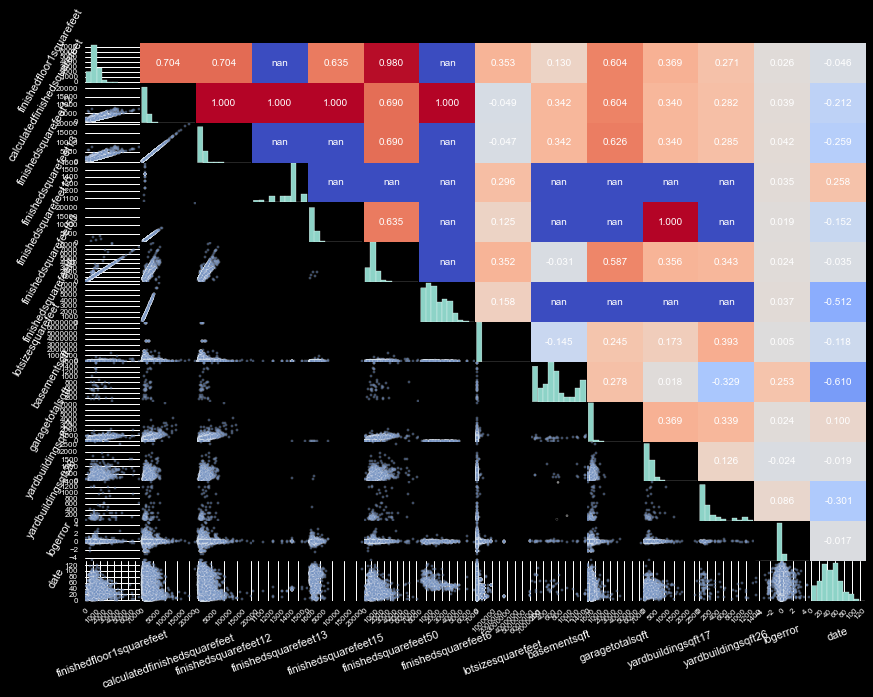

In [79]:
dv.corr_plot( foo, y_label_rotation=60 )

finishedsquarefeet6 correlates with date

finishedsquarefeet13 correlates well too

Run PCA on finished sqft?

In [9]:
bar = np.log10( foo[['calculatedfinishedsquarefeet','finishedsquarefeet12','lotsizesquarefeet']].dropna() )

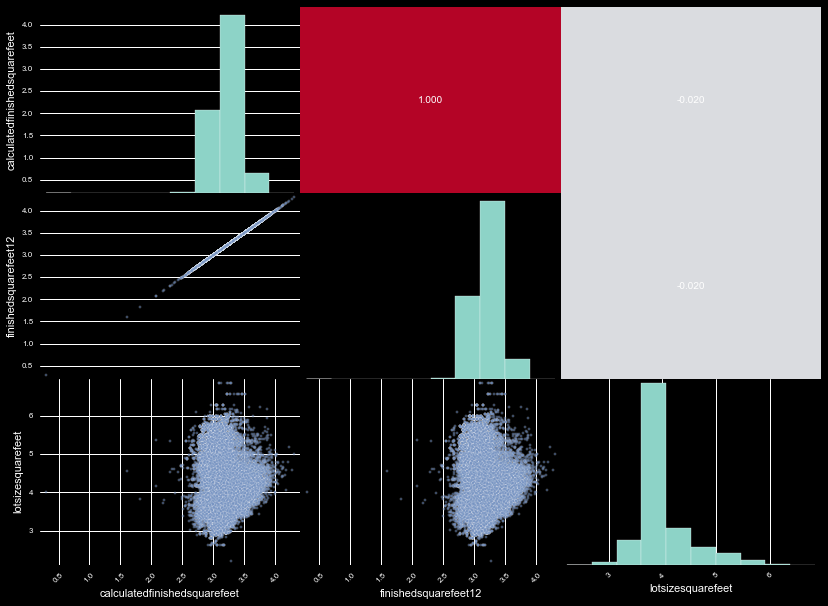

In [11]:
dv.corr_plot( bar, y_label_rotation=90, x_label_rotation=0 )

Only utilize finishedsquarefeet12, lotsizesquarefeet, completely uncorrelated and lots of data

In [100]:
my_df = my_df.drop( fire_list.tolist()+sqft_list , axis=1 )
my_df.columns.values

array(['parcelid', 'bedroomcnt', 'buildingqualitytypeid', 'decktypeid',
       'fips', 'latitude', 'longitude', 'propertycountylandusecode',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'unitcnt', 'yearbuilt', 'numberofstories',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag',
       'taxdelinquencyyear', 'censustractandblock', 'logerror',
       'transactiondate', 'time_to_sale', 'ordinal_date', 'day_of_week'], dtype=object)

In [122]:
tax_census_list = ['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 
                   'taxamount', 'taxdelinquencyyear', 'taxdelinquencyflag']
foo = my_df[ tax_census_list ].copy()
foo['logerror']        = my_df['logerror'].copy()
foo['yearbuilt']       = my_df['yearbuilt'].copy()
foo['time_to_sale']    = my_df['time_to_sale'].copy()
foo['transactiondate'] = my_df['transactiondate'].copy()

foo.isnull().sum().sort_values()

logerror                          0
transactiondate                   0
taxvaluedollarcnt                 1
landtaxvaluedollarcnt             1
taxamount                         6
structuretaxvaluedollarcnt      380
yearbuilt                       756
time_to_sale                    756
taxdelinquencyyear            88492
taxdelinquencyflag            88492
dtype: int64

In [102]:
foo.head()

,rawcensustractandblock,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,yearbuilt,time_to_sale,transactiondate
0,6.111002e+07,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,1986.0,30.0,2016-01-27
1,6.111002e+07,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,1990.0,26.0,2016-03-30
2,6.111001e+07,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,1956.0,60.0,2016-05-27
3,6.111001e+07,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,1965.0,51.0,2016-06-07
4,6.111001e+07,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,1984.0,32.0,2016-08-08


In [106]:
# Census tract and block might be a little too specific. It is just the ID for census stuff,
# And the number can probably vary wildly. Drop.
foo.drop( ['rawcensustractandblock','censustractandblock'], axis=1, inplace=True )

In [118]:
# Assesment years all 2015, useless
foo.drop( ['assessmentyear'], axis=1, inplace=True )

In [108]:
# nan or 'Y', go ahead and 1 hot encode
foo['taxdelinquencyflag'] = foo['taxdelinquencyflag'].fillna(0).replace( {'Y', 1} )

(-1, 1)

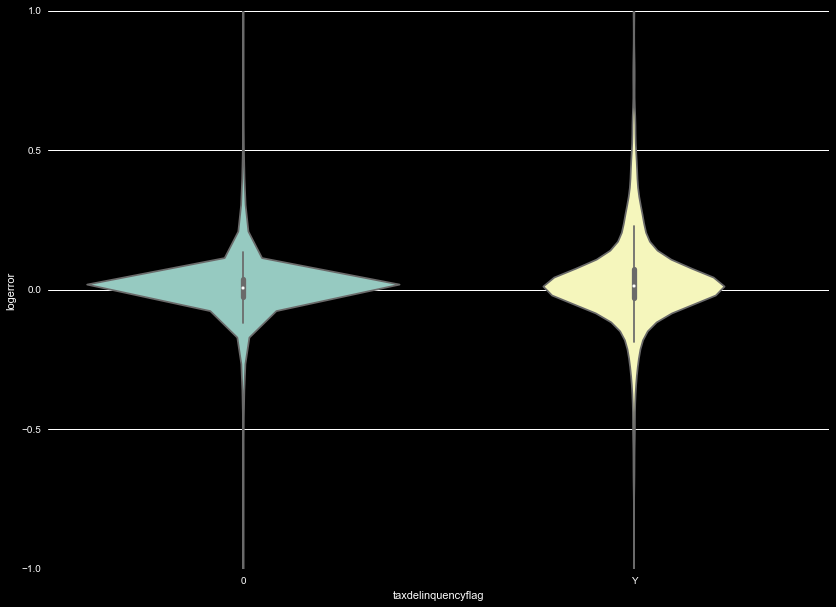

In [112]:
# Being tax delinquent may lead to larger eror
sns.violinplot( data=foo, x='taxdelinquencyflag', y='logerror' )
plt.ylim( -1, 1 )

In [124]:
foo['taxdelinquencyyear'].unique()

array([ nan,  15.,  13.,  14.,  11.,   9.,  12.,  10.,   8.,   7.,   6.,
        99.])

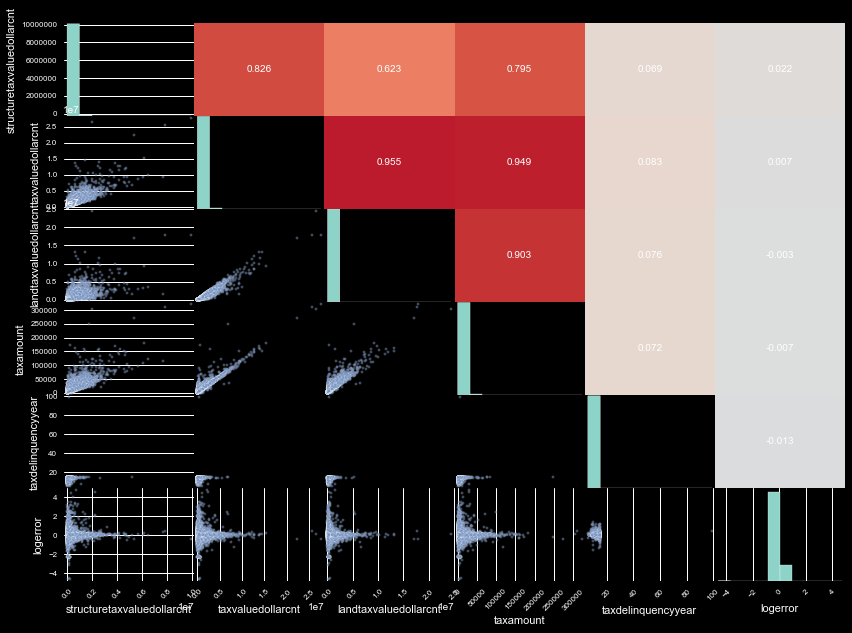

In [129]:
dv.corr_plot( foo[ tax_census_list+['logerror']], y_label_rotation=90, x_label_rotation=0 )

In [144]:
tpca_list = ['structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
bar = np.log10( foo[tpca_list] ).dropna()
bar.describe()

,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
count,89893.000000,89893.000000,89893.000000,89893.000000
mean,5.112578,5.504943,5.210002,3.645557
std,0.349181,0.370353,0.477710,0.328856
min,2.000000,3.018700,2.444045,1.690905
25%,4.909797,5.301095,4.916491,3.459329
50%,5.120574,5.536000,5.286284,3.657782
75%,5.323324,5.733262,5.538947,3.838878
max,6.997740,7.443263,7.389166,5.507770


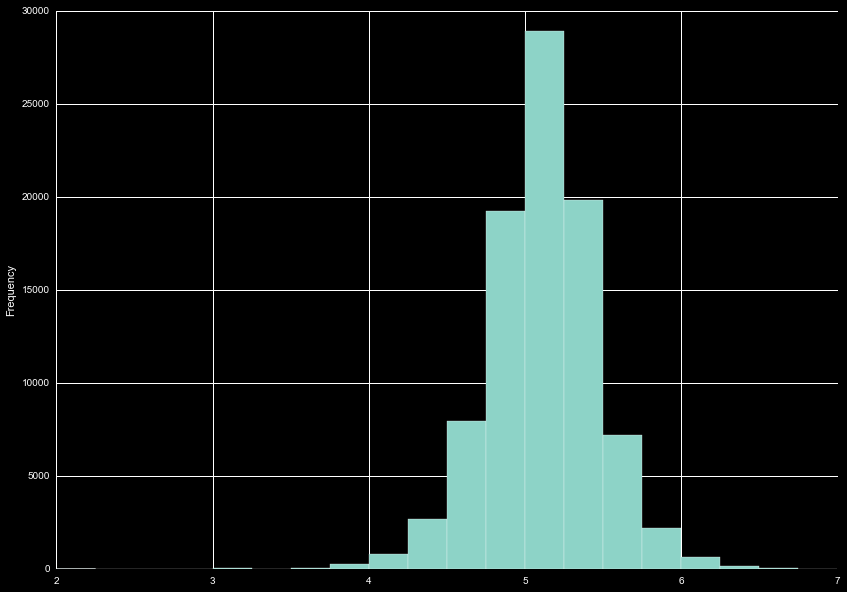

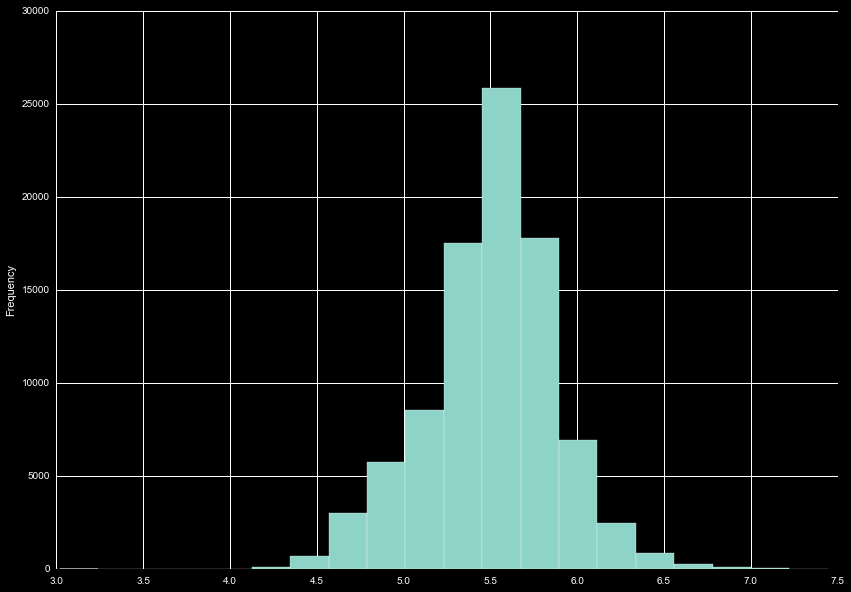

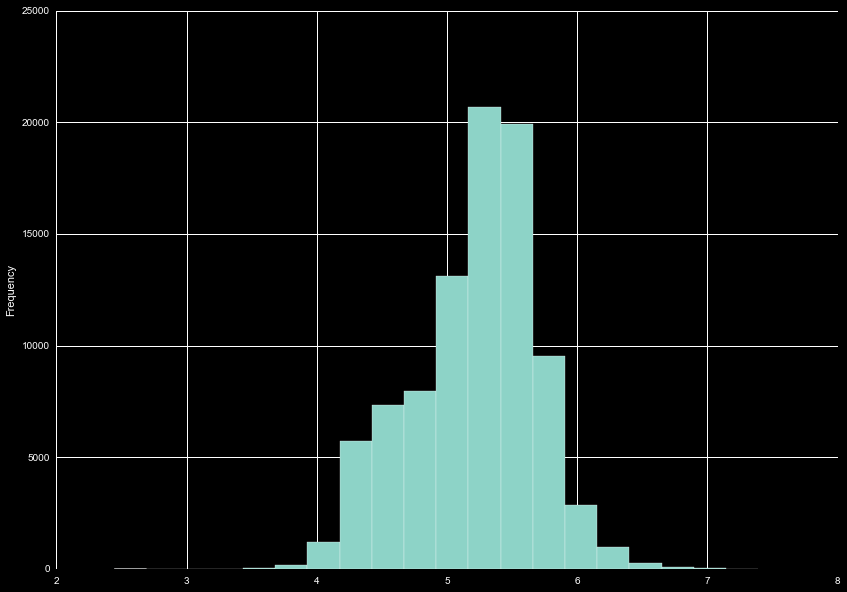

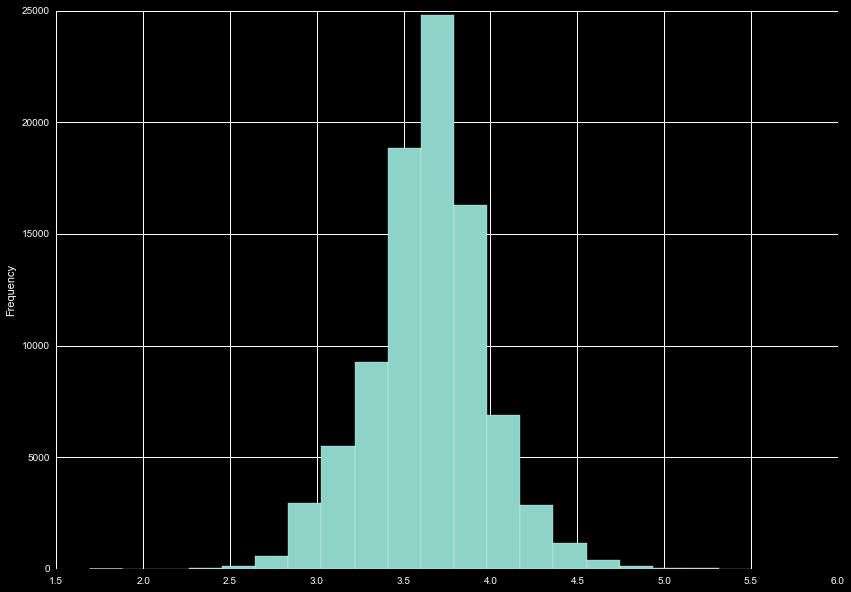

In [140]:
for col in tpca_list:
    bar[col].plot.hist( bins=20 )
    plt.show()

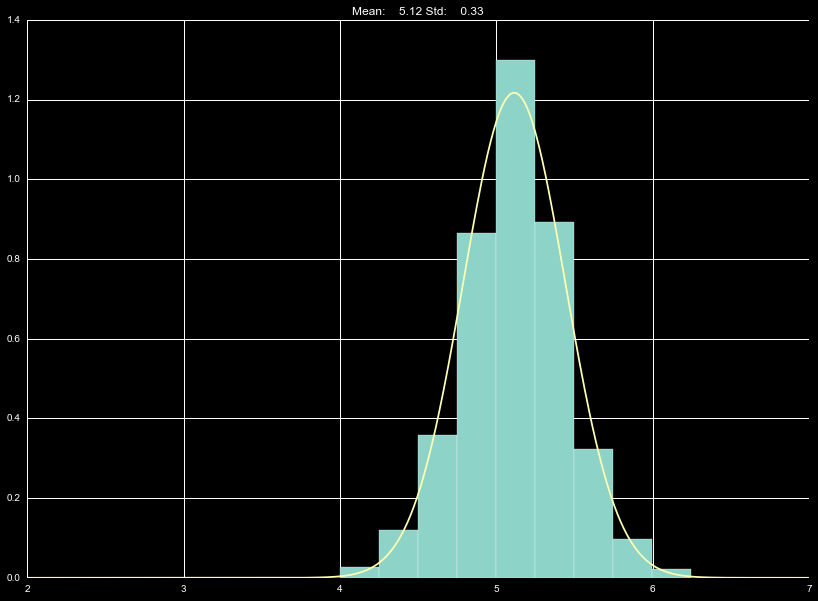

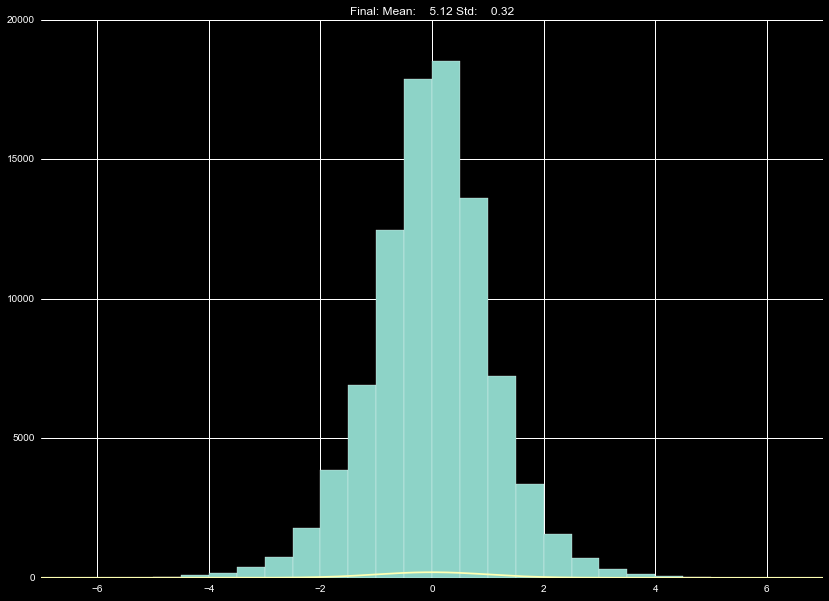

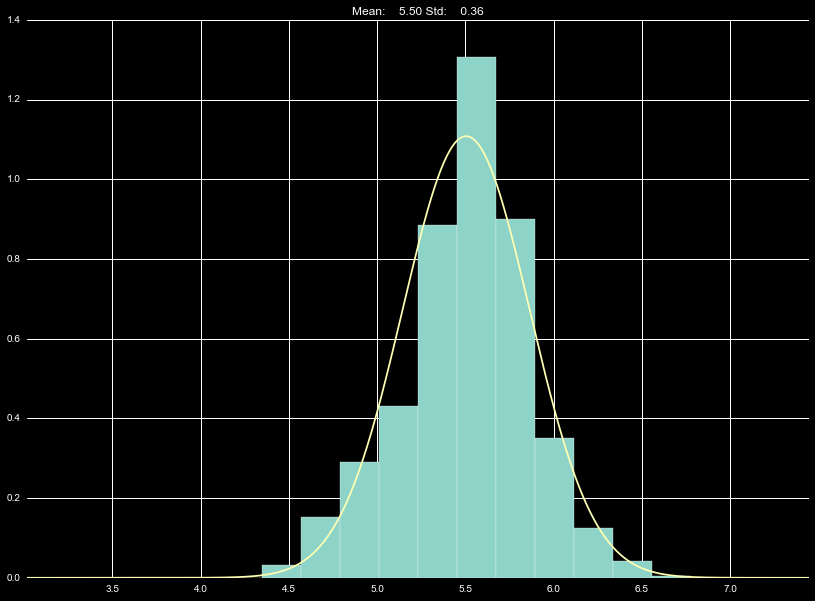

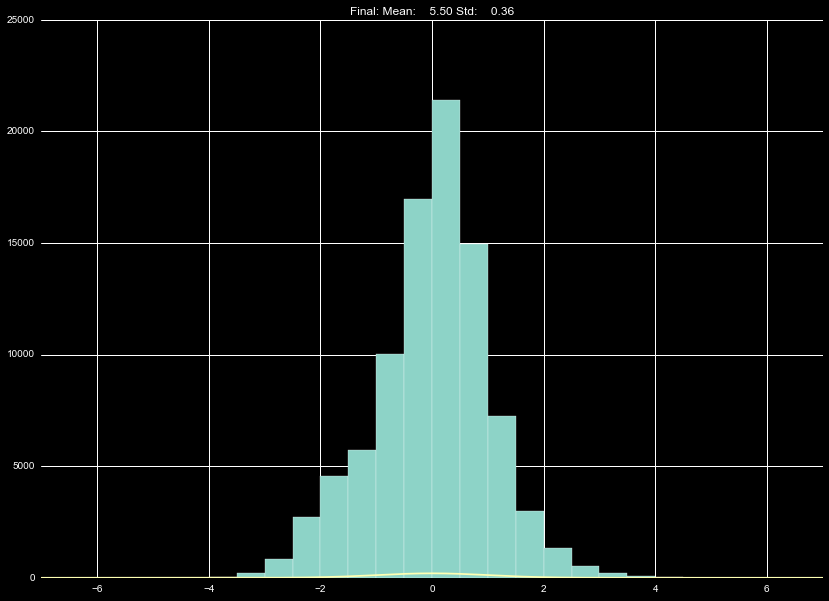

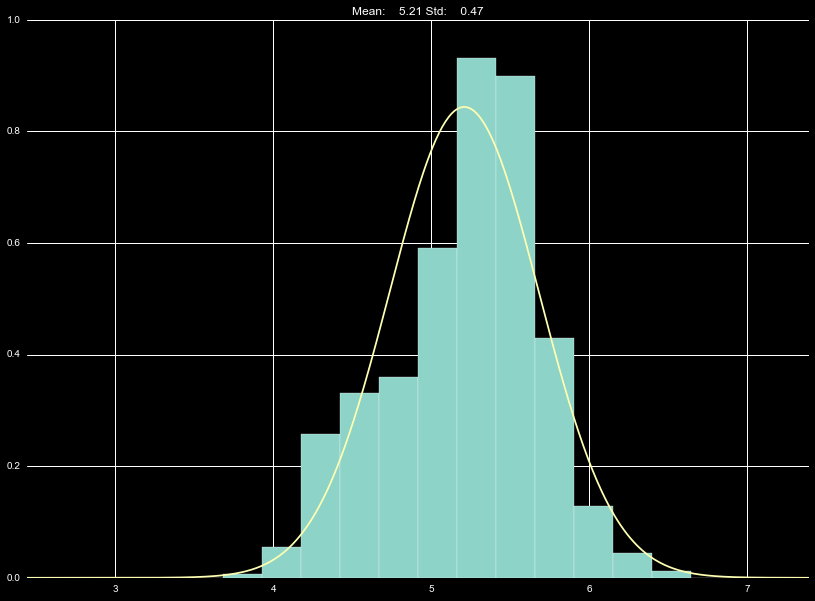

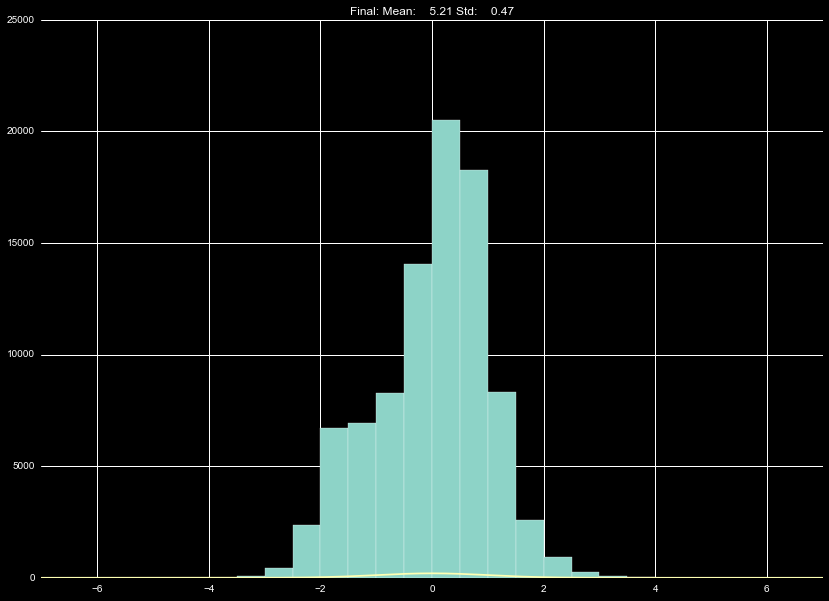

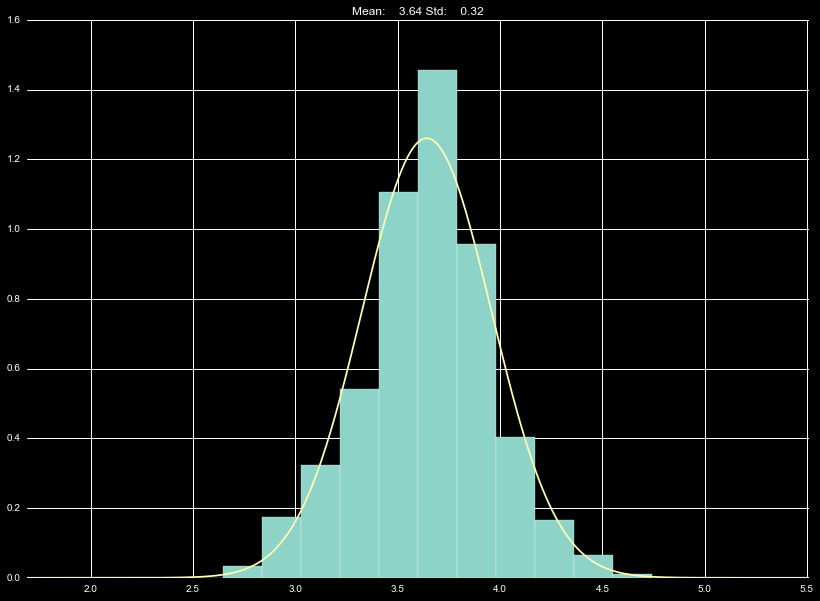

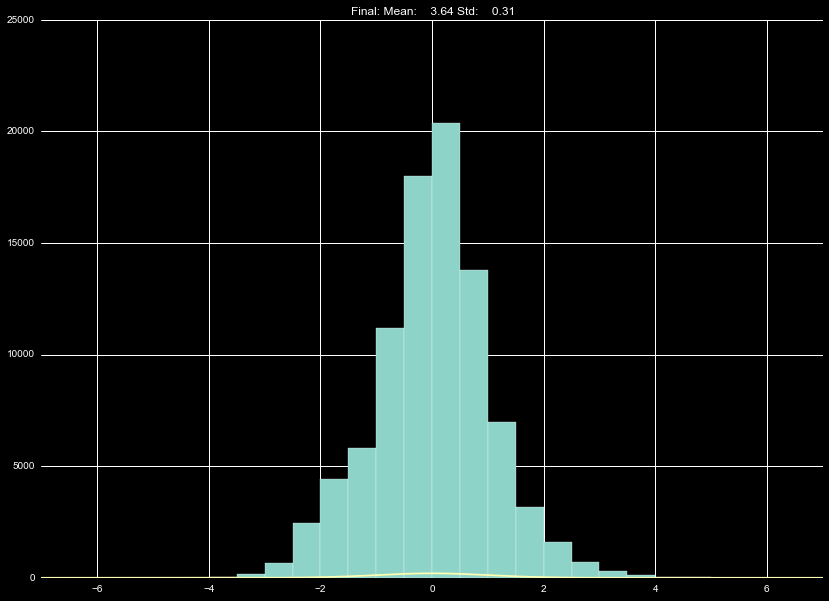

,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
count,89893.000000,89893.000000,89893.000000,89893.000000
mean,-0.009132,0.003351,0.000683,0.012942
std,1.081659,1.033842,1.010902,1.046030
min,-9.650978,-6.937010,-5.852477,-6.204437
25%,-0.637288,-0.565693,-0.620429,-0.579414
50%,0.015638,0.090046,0.162105,0.051828
75%,0.643699,0.640704,0.696776,0.627859
max,5.830544,5.414181,4.612104,5.936287


In [145]:
for col in tpca_list:
    bar[col] = rv.smart_scale( bar, col, n_sigma=3.0 )
bar.describe()

In [148]:
# Use PCA on tax dollar values, 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'
tax_pca = PCA( n_components=2 )
tax_pca.fit( bar )
print tax_pca.explained_variance_ratio_

[ 0.85471028  0.10816395]


Use PCA on a few values, and explore the tax deliquency year further

In [151]:
my_df = my_df.drop( tax_census_list, axis=1 )
my_df.columns.values

array(['parcelid', 'bedroomcnt', 'buildingqualitytypeid', 'decktypeid',
       'fips', 'latitude', 'longitude', 'propertycountylandusecode',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'unitcnt', 'yearbuilt', 'numberofstories', 'assessmentyear',
       'censustractandblock', 'logerror', 'transactiondate',
       'time_to_sale', 'ordinal_date', 'day_of_week'], dtype=object)

In [7]:
misc_list = ['parcelid', 'buildingqualitytypeid', 'decktypeid', 'propertycountylandusecode',
             'propertyzoningdesc', 'regionidcity', 'regionidneighborhood', 'regionidzip', 'roomcnt',
             'unitcnt', 'numberofstories']

foo = my_df[ misc_list ].copy()
foo['logerror']        = my_df['logerror'].copy()
foo['yearbuilt']       = my_df['yearbuilt'].copy()
foo['transactiondate'] = my_df['transactiondate'].copy()

foo.isnull().sum().sort_values()

parcelid                         0
roomcnt                          0
logerror                         0
transactiondate                  0
propertycountylandusecode        1
regionidzip                     35
yearbuilt                      756
regionidcity                  1803
unitcnt                      31922
propertyzoningdesc           31962
buildingqualitytypeid        32911
regionidneighborhood         54263
numberofstories              69705
decktypeid                   89617
dtype: int64

In [155]:
# Change into deck flag
print foo['decktypeid'].unique()
foo['decktypeid'].fillna( 0, inplace=True )
foo['decktypeid'].replace( {66: 1}, inplace=True )
print foo['decktypeid'].unique()

[  0.  66.]
[ 0.  1.]


In [157]:
# Probably useful, but a fair bit of work
foo['propertycountylandusecode'].unique()

array(['1128', '1129', '1111', '1110', '010C', '0100', '0101', '010D',
       '010E', '0200', '0700', '0400', '0300', '122', '34', '01DC', '1',
       '012C', '01HC', '100V', '1117', '0104', '020G', '0109', '96',
       '1321', '010V', '1222', '1116', '010M', '1210', '010G', '0103',
       '38', '010H', '73', '1112', '0108', '135', '010F', '1014', '1410',
       '012D', '0201', '6050', '070D', '1200', '0401', '1720', '020M',
       '105', '012E', '1012', '1011', '1310', '010', '040V', '030G',
       '0110', '0102', '1421', '1432', '0303', '0111', '0130', '1333',
       '01DD', '0', '0210', '0131', '8800', '040A', '200', '0301', '1722',
       '1420', nan, '0114'], dtype=object)

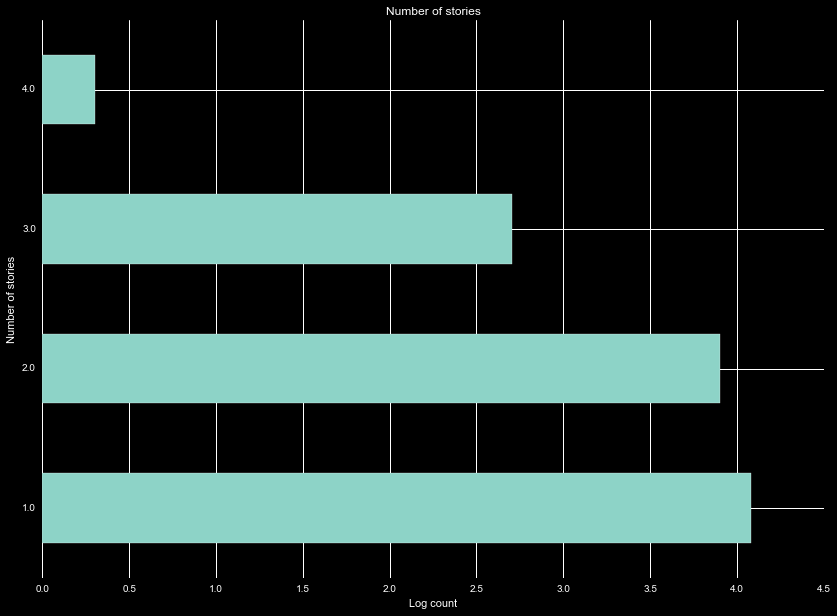

In [15]:
ax = np.log10(foo['numberofstories'].value_counts(sort=True)).plot.barh().set_title( 'Number of stories' )
plt.ylabel( 'Number of stories' )
plt.xlabel( 'Log count' )

In [16]:
# Overwhelming majority are first story, need to probably find good interpolation of values
foo.numberofstories.describe()

count    20570.000000
mean         1.440739
std          0.544498
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: numberofstories, dtype: float64

In [17]:
# Drop
foo['regionidneighborhood'].describe()

count     36012.000000
mean     190646.540237
std      166228.910572
min        6952.000000
25%       46736.000000
50%      118887.000000
75%      274800.000000
max      764167.000000
Name: regionidneighborhood, dtype: float64

In [20]:
# Drop
print foo['regionidcity'].describe()
print len( foo['regionidcity'].unique() )

count     88472.000000
mean      33761.332851
std       46672.393863
min        3491.000000
25%       12447.000000
50%       25218.000000
75%       45457.000000
max      396556.000000
Name: regionidcity, dtype: float64
178


In [21]:
# Drop
print foo['regionidzip'].describe()
print len( foo['regionidzip'].unique() )

count     90240.000000
mean      96586.131184
std        3661.339094
min       95982.000000
25%       96193.000000
50%       96393.000000
75%       96987.000000
max      399675.000000
Name: regionidzip, dtype: float64
389


In [23]:
print foo['buildingqualitytypeid'].describe()
print foo['buildingqualitytypeid'].unique()

count    57364.000000
mean         5.565407
std          1.900602
min          1.000000
25%          4.000000
50%          7.000000
75%          7.000000
max         12.000000
Name: buildingqualitytypeid, dtype: float64
[ nan   4.   7.  10.   1.   8.  12.   6.  11.]


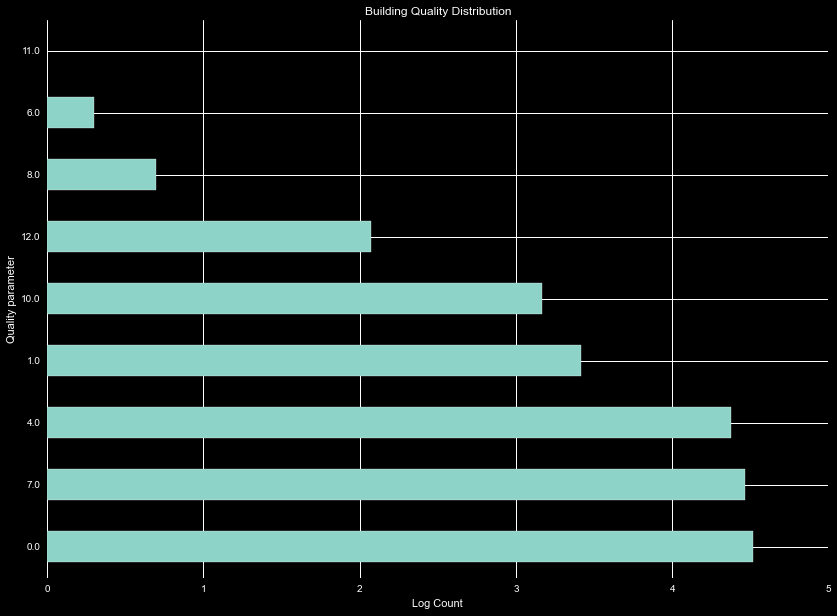

In [37]:
# Let's break shit up into categories, low quality (high number), med quality (mid number), high quality (low number), and unknown
foo['buildingqualitytypeid'].fillna(0,inplace=True)
np.log10( foo['buildingqualitytypeid'].value_counts( sort=True ) ).plot.barh().set_title( 'Building Quality Distribution' )
plt.xlabel( 'Log Count' )
plt.ylabel( 'Quality parameter' )

/home/sean/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


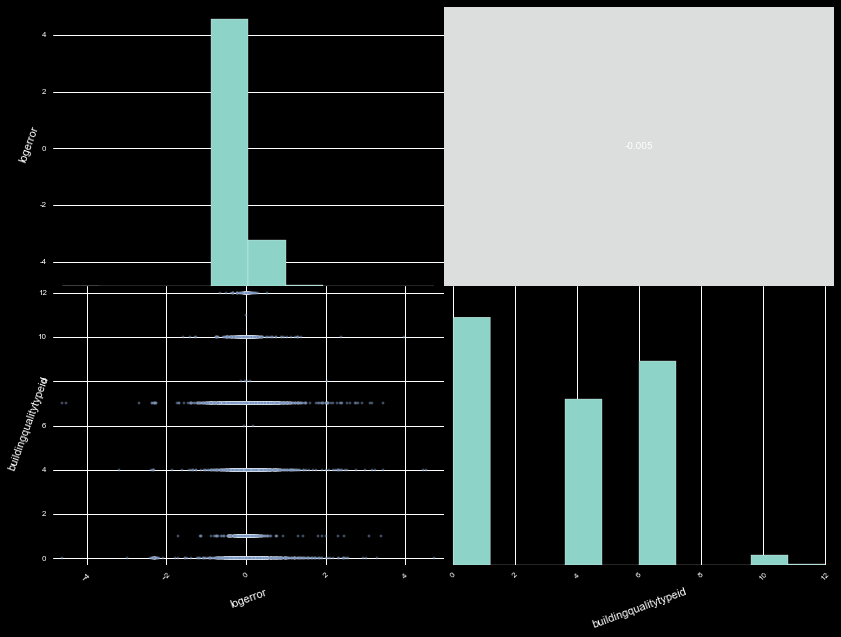

In [30]:
dv.corr_plot( foo[['logerror','buildingqualitytypeid']] )

In [31]:
foo.isnull().sum().sort_values()

parcelid                         0
buildingqualitytypeid            0
roomcnt                          0
logerror                         0
transactiondate                  0
propertycountylandusecode        1
regionidzip                     35
yearbuilt                      756
regionidcity                  1803
unitcnt                      31922
propertyzoningdesc           31962
regionidneighborhood         54263
numberofstories              69705
decktypeid                   89617
dtype: int64

In [33]:
print foo['propertyzoningdesc'].describe()

count     58313
unique     1996
top        LAR1
freq       7678
Name: propertyzoningdesc, dtype: object


count    58353.000000
mean         1.110414
std          0.797235
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        143.000000
Name: unitcnt, dtype: float64
31922


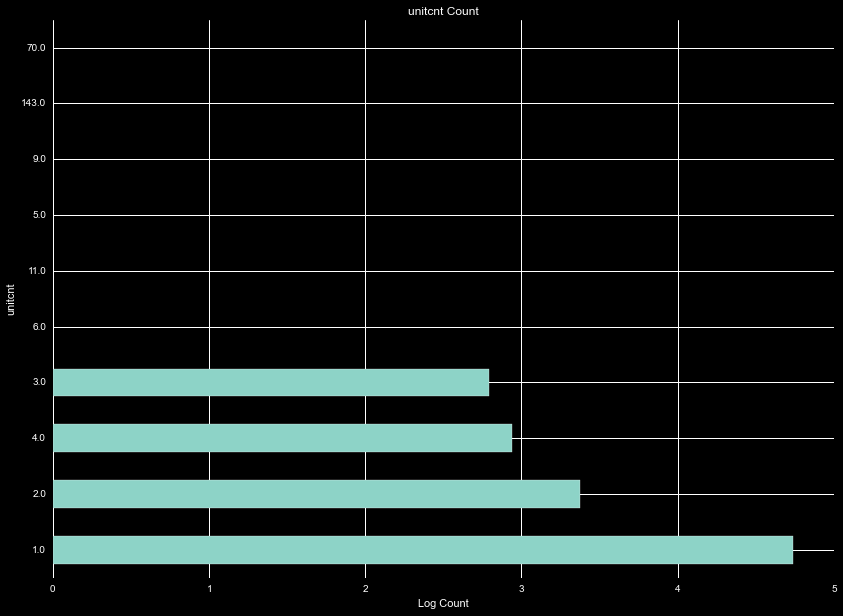

In [39]:
# Break into 1, 2, many story categories
print foo['unitcnt'].describe()
print foo['unitcnt'].isnull().sum()
np.log10( foo['unitcnt'].value_counts( sort=True ) ).plot.barh().set_title( 'unitcnt Count' )
plt.xlabel( 'Log Count' )
plt.ylabel( 'unitcnt' )

count    90275.000000
mean         1.478516
std          2.819627
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: roomcnt, dtype: float64


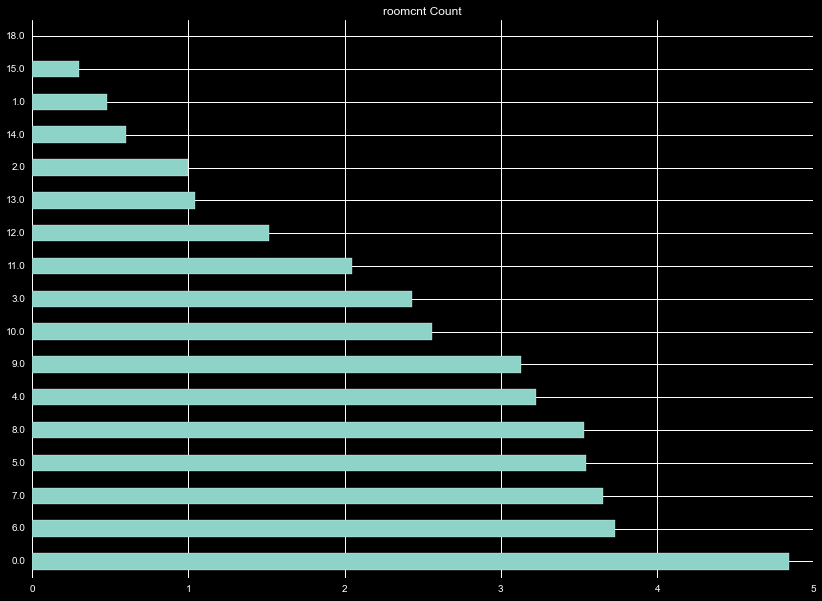

In [44]:
print foo['roomcnt'].describe()
np.log10( foo['roomcnt'].value_counts( sort=True ) ).plot.barh().set_title( 'roomcnt Count' )

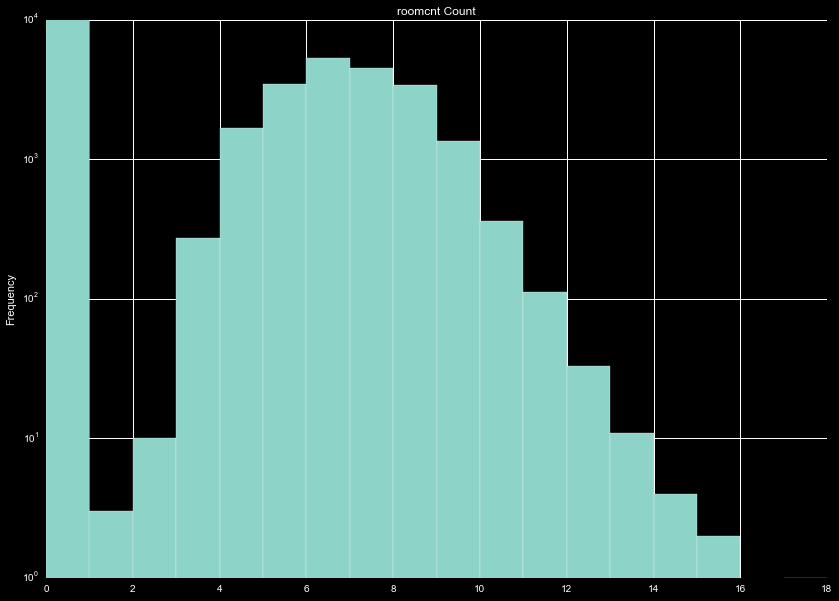

In [55]:
foo['roomcnt'].plot.hist( bins=18 ).set_title( 'roomcnt Count' )
plt.ylim( 1, 10000 )
plt.yscale( 'log' )

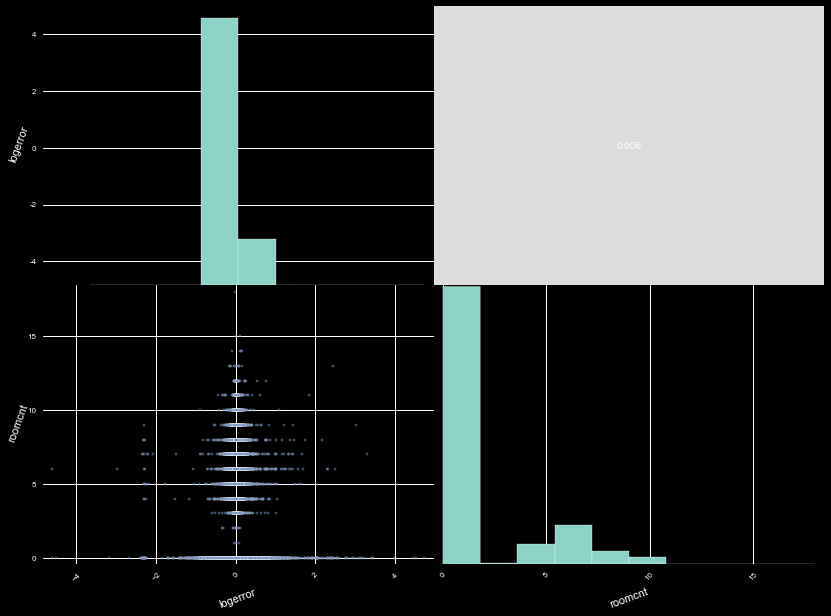

In [42]:
dv.corr_plot( foo[['logerror','roomcnt']] )

Group roomcnt, unknown (0), < 5, > 8, 5-8